In [1]:
import numpy as np
import pandas as pd

feature_o=pd.read_csv('./tmp/cafe_features_200m.csv')
feature_o['zone']=feature_o['addr'].copy()
feature_o['zone']=feature_o['zone'].str.split('區',expand=True).drop([1,2], axis=1)
feature = feature_o.loc[:,'density_2021':'train'].fillna(0)
feature

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
0,30537.582094,-1.038945,3844691,2,1.0,0.0,0.0,0.0,0.0,43.0,0.0,3.0,4.0,0.0,10.0,0.0
1,34199.348503,-1.879027,1857272,4,0.0,0.0,1.0,0.0,1.0,29.0,0.0,3.0,6.0,0.0,8.0,0.0
2,16690.778379,-0.500099,2769267,3,1.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,5.0,0.0,4.0,0.0
3,30029.689819,-0.402234,2750941,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,8.0,0.0
4,37267.488548,-1.043902,1839588,2,0.0,0.0,1.0,0.0,0.0,35.0,0.0,5.0,7.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,33846.823431,-0.448332,904809,1,0.0,3.0,1.0,1.0,0.0,69.0,0.0,1.0,0.0,0.0,0.0,0.0
669,15354.918545,-0.271195,2131815,1,0.0,2.0,0.0,0.0,0.0,19.0,0.0,3.0,1.0,0.0,0.0,0.0
670,4921.167930,-2.656622,77812,1,0.0,1.0,0.0,1.0,0.0,53.0,0.0,2.0,0.0,0.0,0.0,0.0
671,6298.055230,7.973902,991876,1,0.0,1.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0


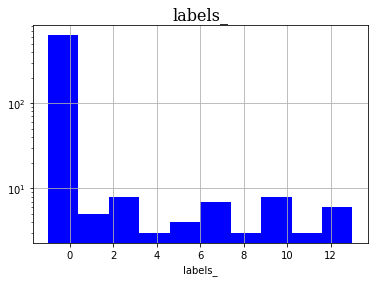

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [149]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import numpy as np

scaler = MinMaxScaler()
X = np.array(scaler.fit_transform(feature))
clustering = DBSCAN(eps=1, metric='cityblock', min_samples=3).fit(X)

# 存模型
clf = pickle.dumps(clustering)

dump(clf, 'MinMaxnearby200m.joblib') 

n, bins, patches = plt.hist(clustering.labels_, facecolor='b',log=True)

plt.xlabel('labels_')

font = {'family': 'serif',
    'weight': 'normal',
    'size': 16,
    }

plt.title('labels_',fontdict=font)
plt.grid(True)
plt.show()

set(clustering.labels_)

In [3]:
feature_o['labels'] = list(clustering.labels_)

In [4]:
feature_o[feature_o['labels'] == 0]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
0,cama,台北市敦化南路二段5號,25.032824,121.549153,30537.582094,-1.038945,3844691,2,1.0,0.0,...,0.0,43.0,0.0,3.0,4.0,0.0,10.0,0.0,台北市敦化南路二段5號,0
1,cama,台北市中山區民生東路二段133號,25.058088,121.532388,34199.348503,-1.879027,1857272,4,0.0,0.0,...,1.0,29.0,0.0,3.0,6.0,0.0,8.0,0.0,台北市中山,0
2,cama,台北市中山區長安東路二段94號,25.048324,121.534597,16690.778379,-0.500099,2769267,3,1.0,0.0,...,0.0,0.0,0.0,4.0,5.0,0.0,4.0,0.0,台北市中山,0
3,cama,台北市中山區長春路133-5號,25.054950,121.531175,30029.689819,-0.402234,2750941,1,1.0,1.0,...,0.0,0.0,1.0,3.0,3.0,0.0,8.0,0.0,台北市中山,0
4,cama,台北市中山區民權東路二段97號,25.062712,121.532380,37267.488548,-1.043902,1839588,2,0.0,0.0,...,0.0,35.0,0.0,5.0,7.0,0.0,2.0,0.0,台北市中山,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,85 cafe,新北市蘆洲區光華路174號,25.082182,121.465159,33846.823431,-0.448332,904809,1,0.0,3.0,...,0.0,69.0,0.0,1.0,0.0,0.0,0.0,0.0,新北市蘆洲,0
669,85 cafe,新北市蘆洲區民族路321號,25.091487,121.474329,15354.918545,-0.271195,2131815,1,0.0,2.0,...,0.0,19.0,0.0,3.0,1.0,0.0,0.0,0.0,新北市蘆洲,0
670,85 cafe,新北市金山區中山路106號,25.219346,121.639930,4921.167930,-2.656622,77812,1,0.0,1.0,...,0.0,53.0,0.0,2.0,0.0,0.0,0.0,0.0,新北市金山,0
671,85 cafe,新北市鶯歌區鶯桃路656號,24.969223,121.329193,6298.055230,7.973902,991876,1,0.0,1.0,...,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,新北市鶯歌,0


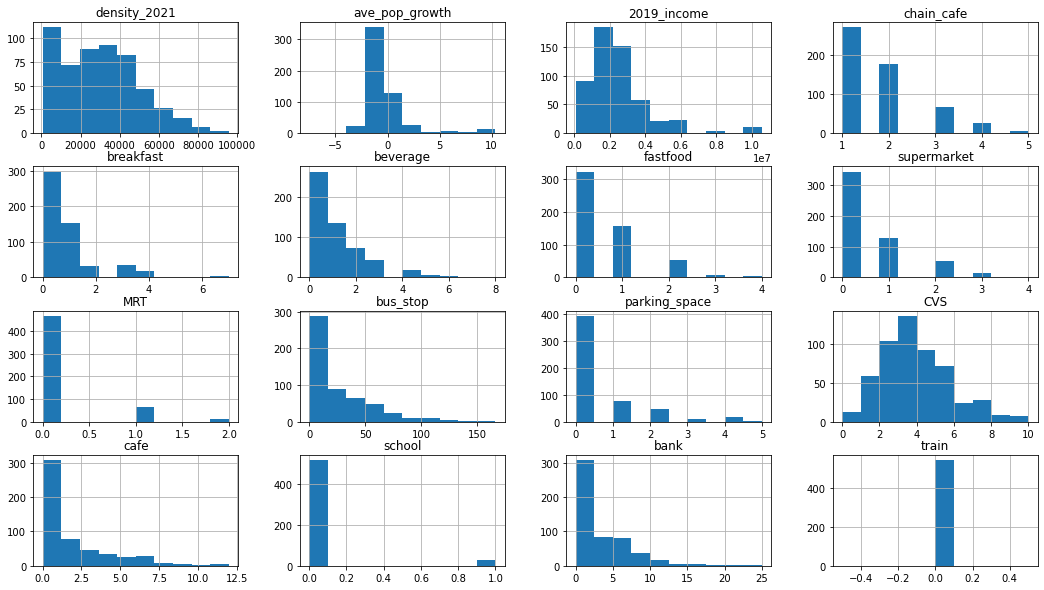

In [5]:
df_0 = feature_o[feature_o['labels'] == 0].loc[:,'density_2021':'train']

df_0.hist(figsize=(18, 10));

# 大部分人口密度(29205.04)
# 人口大多緩步負成長(-0.8002305)
# 年收均值(2164630)
# 平均有(2)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(1)
# 速食餐廳(0)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(3)
# cafe(1)
# school(0)
# 銀行(2)
# 火車站(0)
# 巴士站至少(14.5)站

In [6]:
df_0.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,542.000000,542.000000,5.420000e+02,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.00000,542.000000,542.000000,542.000000,542.0
mean,29865.985855,-0.317685,2.497823e+06,1.749077,0.791513,1.014760,0.551661,0.531365,0.158672,25.020295,0.501845,3.45203,1.985240,0.051661,3.291513,0.0
std,19546.184299,2.145988,1.744704e+06,0.911900,1.183248,1.327849,0.776329,0.812298,0.417621,29.272977,0.985569,1.84734,2.320001,0.221545,3.902684,0.0
min,620.705292,-7.532965,7.781200e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
25%,12675.971232,-1.328827,1.322369e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.0
50%,29205.040899,-0.800230,2.164630e+06,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,14.500000,0.000000,3.00000,1.000000,0.000000,2.000000,0.0
75%,41795.150941,-0.014965,3.018264e+06,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,39.750000,1.000000,5.00000,3.000000,0.000000,5.000000,0.0
max,95907.282896,10.359882,1.057882e+07,5.000000,7.000000,8.000000,4.000000,4.000000,2.000000,166.000000,5.000000,10.00000,12.000000,1.000000,25.000000,0.0


In [7]:
df_0.median()

density_2021      2.920504e+04
ave_pop_growth   -8.002305e-01
2019_income       2.164630e+06
chain_cafe        2.000000e+00
breakfast         0.000000e+00
beverage          1.000000e+00
fastfood          0.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          1.450000e+01
parking_space     0.000000e+00
CVS               3.000000e+00
cafe              1.000000e+00
school            0.000000e+00
bank              2.000000e+00
train             0.000000e+00
dtype: float64

In [8]:
feature_o[feature_o['labels'] == -1]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
15,cama,台北市中正區襄陽路35號,25.043533,121.513723,5734.296784,0.585770,1631191,4,1.0,1.0,...,0.0,56.0,0.0,9.0,7.0,1.0,22.0,0.0,台北市中正,-1
33,cama,台北市南港區南港路一段153號,25.055077,121.613604,16544.553039,0.691721,2200618,3,3.0,5.0,...,0.0,24.0,0.0,1.0,1.0,0.0,1.0,0.0,台北市南港,-1
34,cama,台北市南港區南港路二段6號,25.054352,121.605988,18109.993504,5.352986,2265416,2,0.0,0.0,...,0.0,23.0,0.0,6.0,3.0,0.0,2.0,1.0,台北市南港,-1
38,cama,台北市大同區承德路一段30號,25.050647,121.516749,21679.756337,-2.661784,1336075,4,0.0,2.0,...,0.0,1.0,0.0,5.0,9.0,0.0,4.0,0.0,台北市大同,-1
40,cama,台北市大安區信義路三段174號,25.033155,121.542124,31034.078879,-1.145663,4097363,2,0.0,1.0,...,2.0,0.0,3.0,3.0,2.0,2.0,4.0,0.0,台北市大安,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,85 cafe,新北市五股區成泰路二段156號1樓,25.084031,121.438344,9590.312807,-1.033902,872596,1,1.0,4.0,...,0.0,193.0,2.0,4.0,0.0,0.0,3.0,0.0,新北市五股,-1
627,85 cafe,新北市新店區北宜路1段9號,24.958817,121.538472,6005.258800,0.086185,279043,4,1.0,2.0,...,1.0,68.0,5.0,3.0,0.0,1.0,1.0,0.0,新北市新店,-1
630,85 cafe,新北市新莊區幸福路602號之1,25.049316,121.452117,73916.743538,-1.062359,1731076,1,4.0,0.0,...,0.0,40.0,6.0,2.0,1.0,0.0,4.0,0.0,新北市新莊,-1
652,85 cafe,新北市樹林區中山路一段94號1F,24.991271,121.423167,35662.729822,-0.800880,1579911,2,4.0,3.0,...,0.0,58.0,0.0,4.0,0.0,0.0,7.0,1.0,新北市樹林,-1


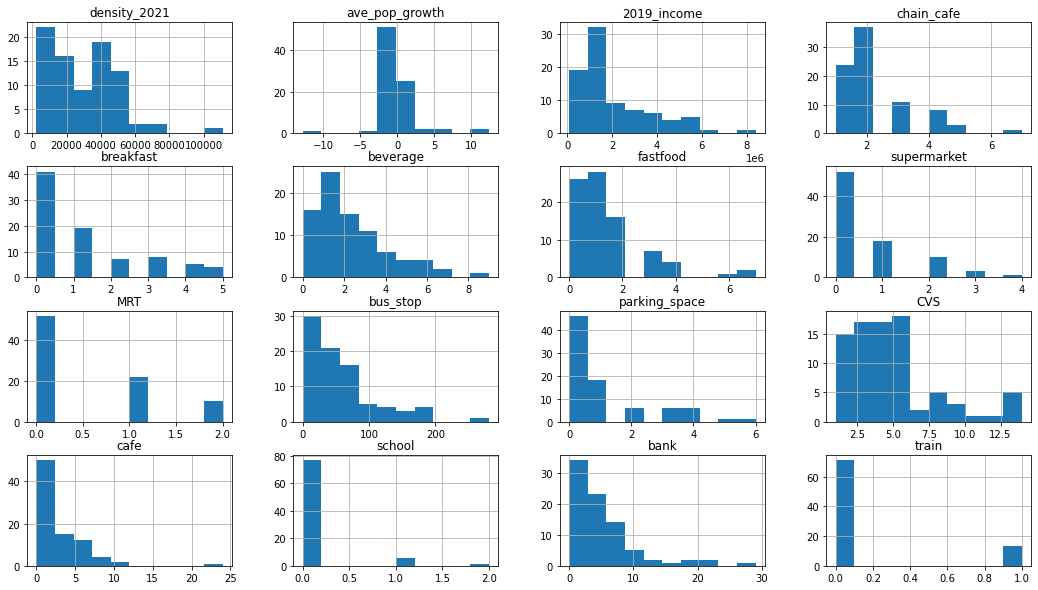

In [9]:
df_i1 = feature_o[feature_o['labels'] == -1].loc[:,'density_2021':'train']

df_i1.hist(figsize=(18, 10));

# 大部分人口密度(30122.07)
# 人口大多緩步負成長(-0.6961709)
# 年收均值(1620670)
# 平均有(2)間小型咖啡廳
# 沒有早餐店(1)
# 飲料店(2)
# 速食餐廳(1)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(4)
# cafe(2)
# school(0)
# 銀行(3)
# 火車站(0)
# 巴士站至少(40)站

In [10]:
df_i1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,84.000000,84.000000,8.400000e+01,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,29687.525286,-0.255890,2.155135e+06,2.202381,1.154762,2.130952,1.392857,0.607143,0.500000,56.059524,0.988095,4.916667,2.964286,0.095238,5.071429,0.154762
std,20053.643468,2.868888,1.653527e+06,1.179951,1.500956,1.968302,1.513138,0.918588,0.702834,55.671660,1.435304,3.155444,3.520838,0.333620,5.483350,0.363850
min,2307.774959,-12.785775,8.480800e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12498.703905,-1.460699,1.124001e+06,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000
50%,30122.071166,-0.696171,1.620670e+06,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,40.000000,0.000000,4.000000,2.000000,0.000000,3.000000,0.000000
75%,42060.193196,0.364187,3.038473e+06,3.000000,2.000000,3.000000,2.000000,1.000000,1.000000,74.000000,1.000000,6.000000,4.000000,0.000000,7.000000,0.000000
max,110994.346742,12.415476,8.391668e+06,7.000000,5.000000,9.000000,7.000000,4.000000,2.000000,281.000000,6.000000,14.000000,24.000000,2.000000,29.000000,1.000000


In [11]:
df_i1.median()

density_2021      3.012207e+04
ave_pop_growth   -6.961709e-01
2019_income       1.620670e+06
chain_cafe        2.000000e+00
breakfast         1.000000e+00
beverage          2.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          4.000000e+01
parking_space     0.000000e+00
CVS               4.000000e+00
cafe              2.000000e+00
school            0.000000e+00
bank              3.000000e+00
train             0.000000e+00
dtype: float64

In [12]:
feature_o[feature_o['labels'] == 1]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
16,cama,台北市中正區南昌路一段39號,25.031563,121.517084,26014.129659,-4.05916,2650936,3,3.0,5.0,...,2.0,10.0,0.0,3.0,3.0,0.0,10.0,0.0,台北市中正,1
85,louisa,台北市臨沂街27巷9-4號,25.041235,121.531428,26122.241810,-2.37891,2834326,3,1.0,3.0,...,2.0,0.0,2.0,4.0,6.0,0.0,7.0,0.0,台北市臨沂街27巷9-4號,1
120,louisa,台北市中正區南海路24號,25.032416,121.516716,26014.129659,-4.05916,2650936,3,2.0,3.0,...,2.0,14.0,0.0,3.0,5.0,0.0,6.0,0.0,台北市中正,1
369,stbks,台北市中正區忠孝東路二段134巷2號,25.041964,121.531706,26122.241810,-2.37891,2834326,3,1.0,2.0,...,2.0,0.0,2.0,6.0,7.0,0.0,12.0,0.0,台北市中正,1
381,stbks,台北市中正區南海路20號,25.032492,121.517011,26014.129659,-4.05916,2650936,3,2.0,3.0,...,2.0,14.0,0.0,3.0,5.0,0.0,7.0,0.0,台北市中正,1


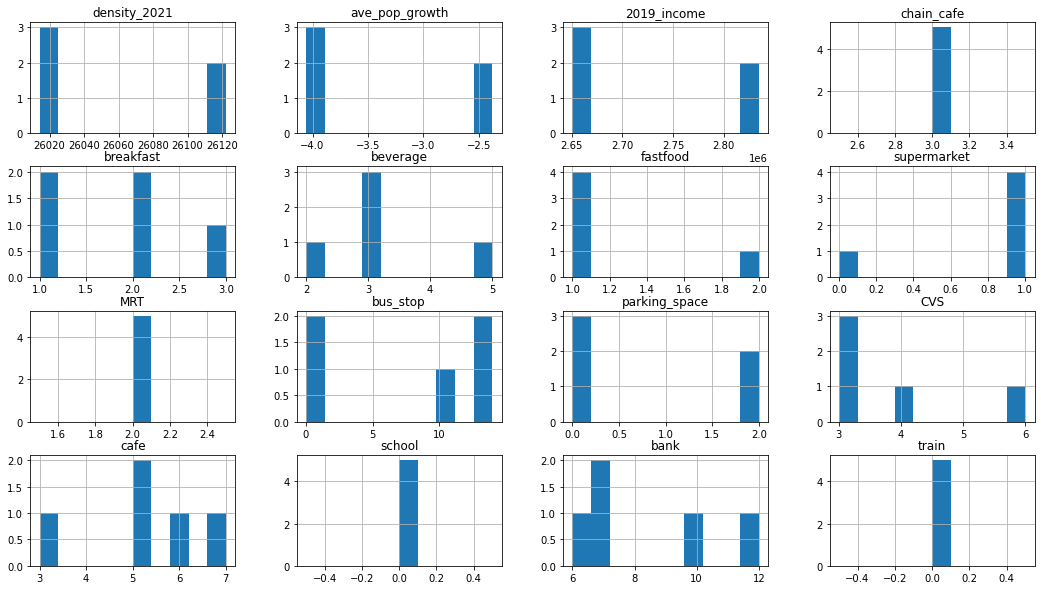

In [13]:
df_1 = feature_o[feature_o['labels'] == 1].loc[:,'density_2021':'train']

df_1.hist(figsize=(18, 10));

# 大部分人口密度(26014.13)
# 人口大多緩步負成長(-4.059160)
# 年收均值(2650936)
# 平均有(3)間小型咖啡廳
# 沒有早餐店(2)
# 飲料店(3)
# 速食餐廳(1)
# 超市(1)
# 捷運(2)
# 停車場(0)
# CVS(3)
# cafe(5)
# school(0)
# 銀行(7)
# 火車站(0)
# 巴士站至少(10)站

In [14]:
feature_o[feature_o['labels'] == 1]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
16,cama,台北市中正區南昌路一段39號,25.031563,121.517084,26014.129659,-4.05916,2650936,3,3.0,5.0,...,2.0,10.0,0.0,3.0,3.0,0.0,10.0,0.0,台北市中正,1
85,louisa,台北市臨沂街27巷9-4號,25.041235,121.531428,26122.241810,-2.37891,2834326,3,1.0,3.0,...,2.0,0.0,2.0,4.0,6.0,0.0,7.0,0.0,台北市臨沂街27巷9-4號,1
120,louisa,台北市中正區南海路24號,25.032416,121.516716,26014.129659,-4.05916,2650936,3,2.0,3.0,...,2.0,14.0,0.0,3.0,5.0,0.0,6.0,0.0,台北市中正,1
369,stbks,台北市中正區忠孝東路二段134巷2號,25.041964,121.531706,26122.241810,-2.37891,2834326,3,1.0,2.0,...,2.0,0.0,2.0,6.0,7.0,0.0,12.0,0.0,台北市中正,1
381,stbks,台北市中正區南海路20號,25.032492,121.517011,26014.129659,-4.05916,2650936,3,2.0,3.0,...,2.0,14.0,0.0,3.0,5.0,0.0,7.0,0.0,台北市中正,1


In [15]:
df_1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.000000e+00,5.0,5.00000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.00000,5.00000,5.0,5.00000,5.0
mean,26057.374519,-3.387060,2.724292e+06,3.0,1.80000,3.200000,1.200000,0.800000,2.0,7.600000,0.800000,3.80000,5.20000,0.0,8.40000,0.0
std,59.215464,0.920311,1.004468e+05,0.0,0.83666,1.095445,0.447214,0.447214,0.0,7.127412,1.095445,1.30384,1.48324,0.0,2.50998,0.0
min,26014.129659,-4.059160,2.650936e+06,3.0,1.00000,2.000000,1.000000,0.000000,2.0,0.000000,0.000000,3.00000,3.00000,0.0,6.00000,0.0
25%,26014.129659,-4.059160,2.650936e+06,3.0,1.00000,3.000000,1.000000,1.000000,2.0,0.000000,0.000000,3.00000,5.00000,0.0,7.00000,0.0
50%,26014.129659,-4.059160,2.650936e+06,3.0,2.00000,3.000000,1.000000,1.000000,2.0,10.000000,0.000000,3.00000,5.00000,0.0,7.00000,0.0
75%,26122.241810,-2.378910,2.834326e+06,3.0,2.00000,3.000000,1.000000,1.000000,2.0,14.000000,2.000000,4.00000,6.00000,0.0,10.00000,0.0
max,26122.241810,-2.378910,2.834326e+06,3.0,3.00000,5.000000,2.000000,1.000000,2.0,14.000000,2.000000,6.00000,7.00000,0.0,12.00000,0.0


In [16]:
df_1.median()

density_2021      2.601413e+04
ave_pop_growth   -4.059160e+00
2019_income       2.650936e+06
chain_cafe        3.000000e+00
breakfast         2.000000e+00
beverage          3.000000e+00
fastfood          1.000000e+00
supermarket       1.000000e+00
MRT               2.000000e+00
bus_stop          1.000000e+01
parking_space     0.000000e+00
CVS               3.000000e+00
cafe              5.000000e+00
school            0.000000e+00
bank              7.000000e+00
train             0.000000e+00
dtype: float64

In [17]:
feature_o[feature_o['labels'] == 2]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
35,cama,台北市南港區忠孝東路七段371號B1,25.052571,121.607496,2156.336462,-2.364998,992878,5,0.0,2.0,...,1.0,10.0,0.0,3.0,0.0,0.0,1.0,1.0,台北市南港,2
162,louisa,台北市南港區忠孝東路七段369號1F,25.052669,121.607208,2156.336462,-2.364998,992878,5,0.0,2.0,...,1.0,18.0,0.0,4.0,0.0,0.0,1.0,1.0,台北市南港,2
163,louisa,台北市南港區忠孝東路7段369號2樓,25.052669,121.607208,2156.336462,-2.364998,992878,5,0.0,2.0,...,1.0,18.0,0.0,4.0,0.0,0.0,1.0,1.0,台北市南港,2
421,stbks,台北市南港區忠孝東路七段371號B2,25.052571,121.607496,2156.336462,-2.364998,992878,5,0.0,2.0,...,1.0,10.0,0.0,3.0,0.0,0.0,1.0,1.0,台北市南港,2
422,stbks,台北市南港區忠孝東路7段359號A棟1樓,25.052512,121.606056,2156.336462,-2.364998,992878,5,0.0,2.0,...,1.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,台北市南港,2


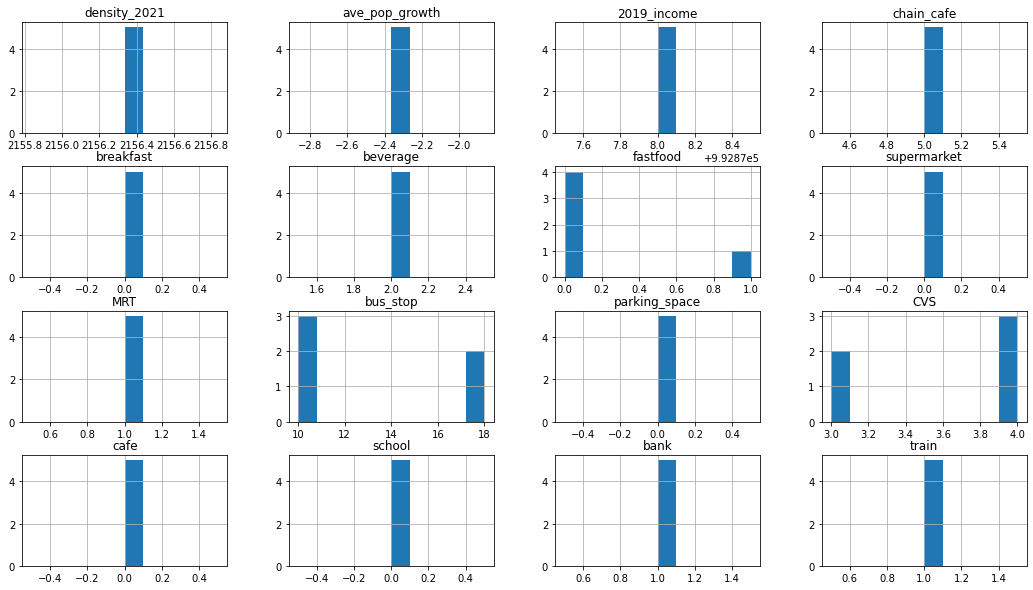

In [18]:
df_2 = feature_o[feature_o['labels'] == 2].loc[:,'density_2021':'train']

df_2.hist(figsize=(18, 10));

# 大部分人口密度(2156.336462)
# 人口大多緩步負成長(-2.364998)
# 年收均值(992878)
# 平均有(5)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(2)
# 速食餐廳(0)
# 超市(0)
# 捷運(1)
# 停車場(3)
# CVS(4)
# cafe(2)
# school(0)
# 銀行(1)
# 火車站(1)
# 巴士站至少(10)站

In [19]:
df_2.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.0,5.0,5.0,5.0,5.000000,5.0,5.0,5.00000,5.0,5.000000,5.0,5.0,5.0,5.0
mean,2156.336462,-2.364998,992878.0,5.0,0.0,2.0,0.200000,0.0,1.0,13.20000,0.0,3.600000,0.0,0.0,1.0,1.0
std,0.000000,0.000000,0.0,0.0,0.0,0.0,0.447214,0.0,0.0,4.38178,0.0,0.547723,0.0,0.0,0.0,0.0
min,2156.336462,-2.364998,992878.0,5.0,0.0,2.0,0.000000,0.0,1.0,10.00000,0.0,3.000000,0.0,0.0,1.0,1.0
25%,2156.336462,-2.364998,992878.0,5.0,0.0,2.0,0.000000,0.0,1.0,10.00000,0.0,3.000000,0.0,0.0,1.0,1.0
50%,2156.336462,-2.364998,992878.0,5.0,0.0,2.0,0.000000,0.0,1.0,10.00000,0.0,4.000000,0.0,0.0,1.0,1.0
75%,2156.336462,-2.364998,992878.0,5.0,0.0,2.0,0.000000,0.0,1.0,18.00000,0.0,4.000000,0.0,0.0,1.0,1.0
max,2156.336462,-2.364998,992878.0,5.0,0.0,2.0,1.000000,0.0,1.0,18.00000,0.0,4.000000,0.0,0.0,1.0,1.0


In [20]:
feature_o[feature_o['labels'] == 2]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
35,cama,台北市南港區忠孝東路七段371號B1,25.052571,121.607496,2156.336462,-2.364998,992878,5,0.0,2.0,...,1.0,10.0,0.0,3.0,0.0,0.0,1.0,1.0,台北市南港,2
162,louisa,台北市南港區忠孝東路七段369號1F,25.052669,121.607208,2156.336462,-2.364998,992878,5,0.0,2.0,...,1.0,18.0,0.0,4.0,0.0,0.0,1.0,1.0,台北市南港,2
163,louisa,台北市南港區忠孝東路7段369號2樓,25.052669,121.607208,2156.336462,-2.364998,992878,5,0.0,2.0,...,1.0,18.0,0.0,4.0,0.0,0.0,1.0,1.0,台北市南港,2
421,stbks,台北市南港區忠孝東路七段371號B2,25.052571,121.607496,2156.336462,-2.364998,992878,5,0.0,2.0,...,1.0,10.0,0.0,3.0,0.0,0.0,1.0,1.0,台北市南港,2
422,stbks,台北市南港區忠孝東路7段359號A棟1樓,25.052512,121.606056,2156.336462,-2.364998,992878,5,0.0,2.0,...,1.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,台北市南港,2


In [21]:
df_2.median()

density_2021        2156.336462
ave_pop_growth        -2.364998
2019_income       992878.000000
chain_cafe             5.000000
breakfast              0.000000
beverage               2.000000
fastfood               0.000000
supermarket            0.000000
MRT                    1.000000
bus_stop              10.000000
parking_space          0.000000
CVS                    4.000000
cafe                   0.000000
school                 0.000000
bank                   1.000000
train                  1.000000
dtype: float64

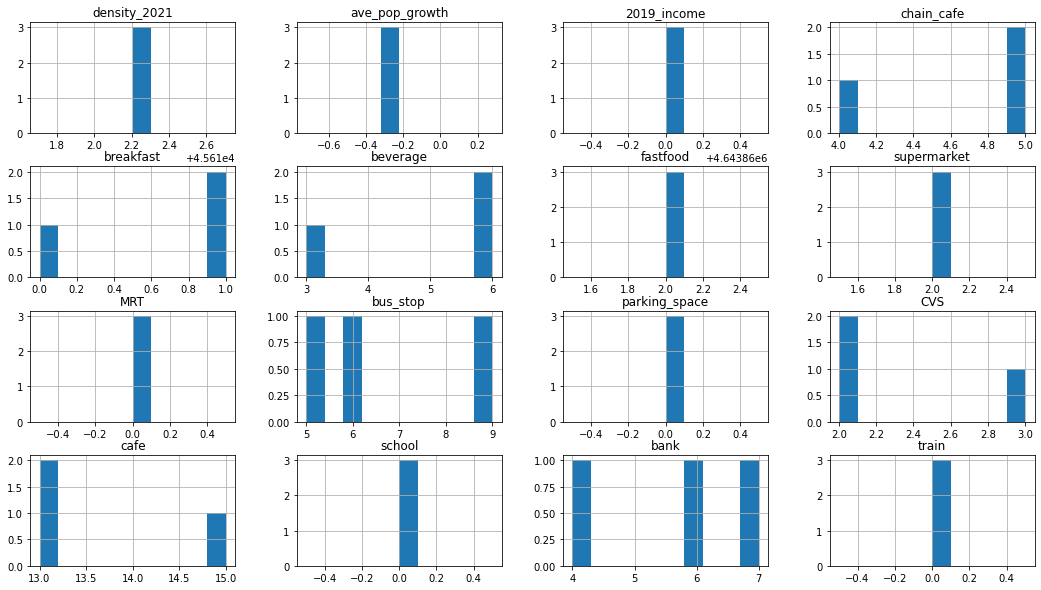

In [22]:
df_3 = feature_o[feature_o['labels'] == 3].loc[:,'density_2021':'train']

df_3.hist(figsize=(18, 10));

# 大部分人口密度(45612.21)
# 人口大多緩步負成長(-0.2215433)
# 年收均值(4643860)
# 平均有(5)間小型咖啡廳
# 沒有早餐店(1)
# 飲料店(6)
# 速食餐廳(2)
# 超市(2)
# 捷運(0)
# 停車場(0)
# CVS(2)
# cafe(13)
# school(0)
# 銀行(6)
# 火車站(0)
# 巴士站至少(6)站

In [23]:
feature_o[feature_o['labels'] == 3]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
46,cama,台北市大安區羅斯福路三段325號,25.017077,121.532236,45612.205397,-0.221543,4643860,5,1.0,6.0,...,0.0,6.0,0.0,3.0,13.0,0.0,6.0,0.0,台北市大安,3
95,louisa,台北市新生南路三段100號,25.016876,121.532938,45612.205397,-0.221543,4643860,5,0.0,6.0,...,0.0,5.0,0.0,2.0,13.0,0.0,4.0,0.0,台北市新生南路三段100號,3
443,stbks,台北市大安區羅斯福路三段301號,25.017447,121.531859,45612.205397,-0.221543,4643860,4,1.0,3.0,...,0.0,9.0,0.0,2.0,15.0,0.0,7.0,0.0,台北市大安,3


In [24]:
df_3.median()

density_2021      4.561221e+04
ave_pop_growth   -2.215433e-01
2019_income       4.643860e+06
chain_cafe        5.000000e+00
breakfast         1.000000e+00
beverage          6.000000e+00
fastfood          2.000000e+00
supermarket       2.000000e+00
MRT               0.000000e+00
bus_stop          6.000000e+00
parking_space     0.000000e+00
CVS               2.000000e+00
cafe              1.300000e+01
school            0.000000e+00
bank              6.000000e+00
train             0.000000e+00
dtype: float64

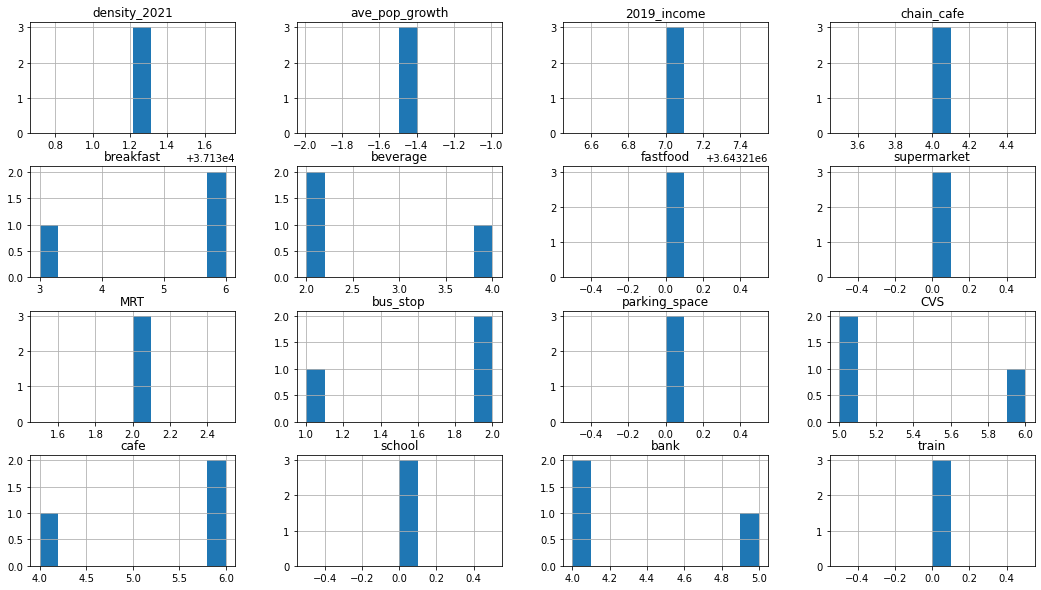

In [25]:
df_4 = feature_o[feature_o['labels'] == 4].loc[:,'density_2021':'train']

df_4.hist(figsize=(18, 10));

# 大部分人口密度(37131.21)
# 人口大多緩步負成長(-1.493150)
# 年收均值(3643217)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(6)
# 飲料店(2)
# 速食餐廳(0)
# 超市(0)
# 捷運(2)
# 停車場(0)
# CVS(5)
# cafe(6)
# school(0)
# 銀行(4)
# 火車站(0)
# 巴士站至少(2)站

In [26]:
feature_o[feature_o['labels'] == 4]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
47,cama,台北市大安區復興南路一段133號,25.042764,121.544088,37131.214542,-1.49315,3643217,4,6.0,2.0,...,2.0,2.0,0.0,5.0,6.0,0.0,5.0,0.0,台北市大安,4
192,louisa,台北市大安區復興南路一段133-1號,25.042764,121.544214,37131.214542,-1.49315,3643217,4,6.0,2.0,...,2.0,2.0,0.0,5.0,6.0,0.0,4.0,0.0,台北市大安,4
449,stbks,台北市大安區復興南路一段135巷9號 (SOGO百貨忠孝館後門對面),25.042724,121.544825,37131.214542,-1.49315,3643217,4,3.0,4.0,...,2.0,1.0,0.0,6.0,4.0,0.0,4.0,0.0,台北市大安,4


In [27]:
df_4.median()

density_2021      3.713121e+04
ave_pop_growth   -1.493150e+00
2019_income       3.643217e+06
chain_cafe        4.000000e+00
breakfast         6.000000e+00
beverage          2.000000e+00
fastfood          0.000000e+00
supermarket       0.000000e+00
MRT               2.000000e+00
bus_stop          2.000000e+00
parking_space     0.000000e+00
CVS               5.000000e+00
cafe              6.000000e+00
school            0.000000e+00
bank              4.000000e+00
train             0.000000e+00
dtype: float64

In [28]:
df_5 = feature_o[feature_o['labels'] == 5].loc[:,'density_2021':'train']
df_5.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.0,4.0,4.00,4.0,4.0,4.0,4.0,4.00,4.0,4.00,4.0,4.0,4.0,4.0
mean,15641.543072,1.141744,3539135.0,4.0,0.75,2.0,1.0,0.0,1.0,49.25,0.5,1.25,1.0,0.0,0.0,0.0
std,0.000000,0.000000,0.0,0.0,1.50,0.0,0.0,0.0,0.0,8.50,1.0,0.50,0.0,0.0,0.0,0.0
min,15641.543072,1.141744,3539135.0,4.0,0.00,2.0,1.0,0.0,1.0,45.00,0.0,1.00,1.0,0.0,0.0,0.0
25%,15641.543072,1.141744,3539135.0,4.0,0.00,2.0,1.0,0.0,1.0,45.00,0.0,1.00,1.0,0.0,0.0,0.0
50%,15641.543072,1.141744,3539135.0,4.0,0.00,2.0,1.0,0.0,1.0,45.00,0.0,1.00,1.0,0.0,0.0,0.0
75%,15641.543072,1.141744,3539135.0,4.0,0.75,2.0,1.0,0.0,1.0,49.25,0.5,1.25,1.0,0.0,0.0,0.0
max,15641.543072,1.141744,3539135.0,4.0,3.00,2.0,1.0,0.0,1.0,62.00,2.0,2.00,1.0,0.0,0.0,0.0


In [29]:
df_5.median()

density_2021      1.564154e+04
ave_pop_growth    1.141744e+00
2019_income       3.539135e+06
chain_cafe        4.000000e+00
breakfast         0.000000e+00
beverage          2.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               1.000000e+00
bus_stop          4.500000e+01
parking_space     0.000000e+00
CVS               1.000000e+00
cafe              1.000000e+00
school            0.000000e+00
bank              0.000000e+00
train             0.000000e+00
dtype: float64

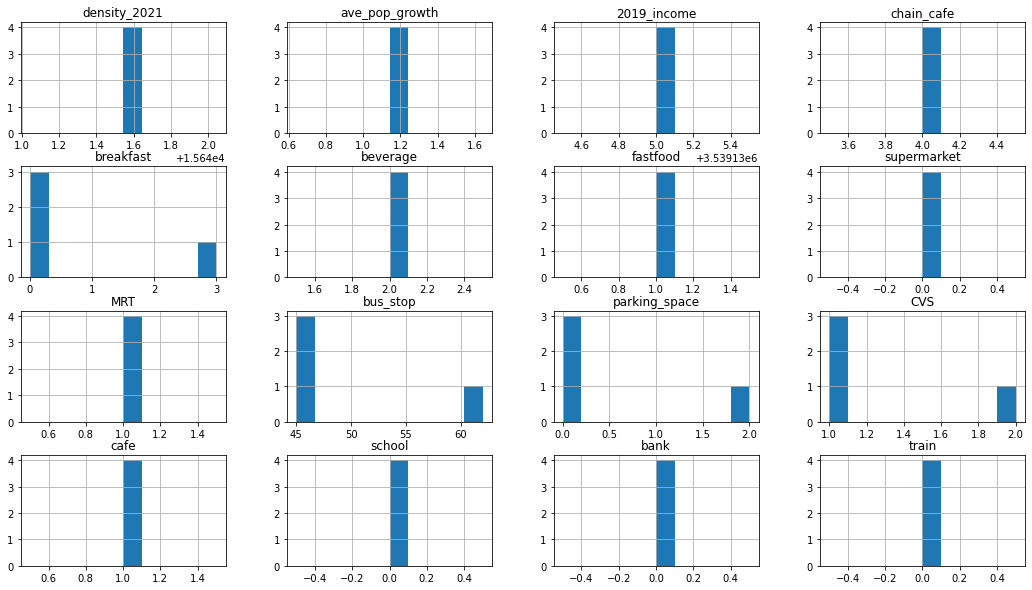

In [30]:
df_5.hist(figsize=(18, 10));

# 大部分人口密度(15641.54)
# 人口大多緩步負成長(1.141744)
# 年收均值(3539135)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(2)
# 速食餐廳(1)
# 超市(0)
# 捷運(1)
# 停車場(0)
# CVS(1)
# cafe(1)
# school(0)
# 銀行(0)
# 火車站(0)
# 巴士站至少(45)站

In [31]:
feature_o[feature_o['labels'] == 6]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
98,louisa,台北市中山北路一段140巷138號,25.051451,121.520449,19806.234807,-1.448197,1982235,2,0.0,3.0,...,2.0,1.0,1.0,2.0,15.0,1.0,3.0,0.0,台北市中山北路一段140巷138號,6
176,louisa,台北市大同區南京西路65號,25.053118,121.518932,43157.003800,-0.956769,1841575,2,0.0,0.0,...,2.0,3.0,1.0,1.0,13.0,1.0,6.0,0.0,台北市大同,6
439,stbks,台北市大同區南京西路36號1F,25.052675,121.519576,30955.766106,-1.645254,1562629,3,0.0,0.0,...,2.0,3.0,1.0,1.0,20.0,1.0,6.0,0.0,台北市大同,6


In [32]:
df_6=feature_o[feature_o['labels'] == 6].loc[:,'density_2021':'train']
df_6.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000,3.000000e+00,3.000000,3.0,3.000000,3.0,3.0,3.0,3.000000,3.0,3.000000,3.000000,3.0,3.000000,3.0
mean,31306.334904,-1.350074,1.795480e+06,2.333333,0.0,1.000000,1.0,0.0,2.0,2.333333,1.0,1.333333,16.000000,1.0,5.000000,0.0
std,11679.331188,0.354576,2.135670e+05,0.577350,0.0,1.732051,0.0,0.0,0.0,1.154701,0.0,0.577350,3.605551,0.0,1.732051,0.0
min,19806.234807,-1.645254,1.562629e+06,2.000000,0.0,0.000000,1.0,0.0,2.0,1.000000,1.0,1.000000,13.000000,1.0,3.000000,0.0
25%,25381.000456,-1.546726,1.702102e+06,2.000000,0.0,0.000000,1.0,0.0,2.0,2.000000,1.0,1.000000,14.000000,1.0,4.500000,0.0
50%,30955.766106,-1.448197,1.841575e+06,2.000000,0.0,0.000000,1.0,0.0,2.0,3.000000,1.0,1.000000,15.000000,1.0,6.000000,0.0
75%,37056.384953,-1.202483,1.911905e+06,2.500000,0.0,1.500000,1.0,0.0,2.0,3.000000,1.0,1.500000,17.500000,1.0,6.000000,0.0
max,43157.003800,-0.956769,1.982235e+06,3.000000,0.0,3.000000,1.0,0.0,2.0,3.000000,1.0,2.000000,20.000000,1.0,6.000000,0.0


In [33]:
df_6.median()

density_2021      3.095577e+04
ave_pop_growth   -1.448197e+00
2019_income       1.841575e+06
chain_cafe        2.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               2.000000e+00
bus_stop          3.000000e+00
parking_space     1.000000e+00
CVS               1.000000e+00
cafe              1.500000e+01
school            1.000000e+00
bank              6.000000e+00
train             0.000000e+00
dtype: float64

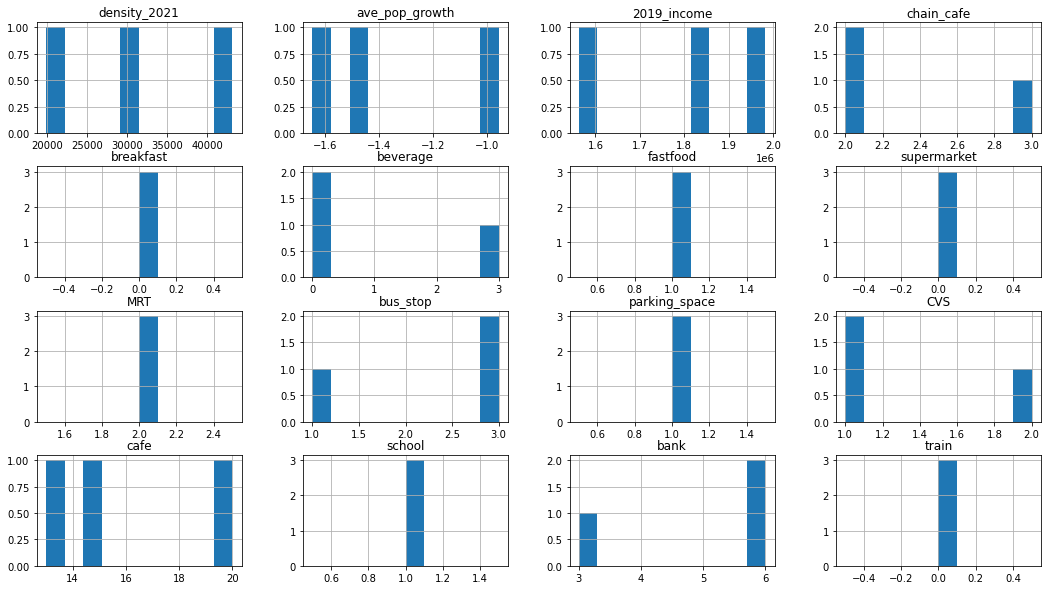

In [34]:
df_6.hist(figsize=(18, 10));

# 大部分人口密度(30955.77)
# 人口成長(-1.448197)
# 年收均值(1841575)
# 平均有(2)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(0)
# 速食餐廳(1)
# 超市(0)
# 捷運(2)
# 停車場(0)
# CVS(1)
# cafe(15)
# school(1)
# 銀行(6)
# 火車站(0)
# 巴士站至少(3)站

In [35]:
feature_o[feature_o['labels'] == 7]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
117,louisa,台北市中正區信陽街5號之2,25.044699,121.516700,5734.296784,0.58577,1631191,6,0.0,6.0,...,2.0,29.0,1.0,11.0,3.0,0.0,9.0,0.0,台北市中正,7
121,louisa,台北市中正區忠孝西路一段38號B1-B櫃,25.046215,121.516436,5734.296784,0.58577,1631191,7,0.0,4.0,...,2.0,23.0,0.0,19.0,2.0,0.0,3.0,0.0,台北市中正,7
125,louisa,台北市中正區忠孝西路一段50號1樓,25.046303,121.515823,5734.296784,0.58577,1631191,8,0.0,5.0,...,2.0,20.0,0.0,17.0,2.0,0.0,5.0,0.0,台北市中正,7
373,stbks,台北市中正區南陽街1號2F,25.045715,121.516229,5734.296784,0.58577,1631191,7,0.0,6.0,...,2.0,27.0,0.0,14.0,3.0,0.0,9.0,0.0,台北市中正,7


In [36]:
df_7=feature_o[feature_o['labels'] == 7].loc[:,'density_2021':'train']
df_7.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.00000,4.0,4.000000,4.0,4.000000,4.000000,4.0,4.0,4.000000,4.00,4.00,4.00000,4.0,4.0,4.0
mean,5734.296784,0.58577,1631191.0,7.000000,0.0,5.250000,6.000000,0.0,2.0,24.750000,0.25,15.25,2.50000,0.0,6.5,0.0
std,0.000000,0.00000,0.0,0.816497,0.0,0.957427,2.160247,0.0,0.0,4.031129,0.50,3.50,0.57735,0.0,3.0,0.0
min,5734.296784,0.58577,1631191.0,6.000000,0.0,4.000000,4.000000,0.0,2.0,20.000000,0.00,11.00,2.00000,0.0,3.0,0.0
25%,5734.296784,0.58577,1631191.0,6.750000,0.0,4.750000,4.750000,0.0,2.0,22.250000,0.00,13.25,2.00000,0.0,4.5,0.0
50%,5734.296784,0.58577,1631191.0,7.000000,0.0,5.500000,5.500000,0.0,2.0,25.000000,0.00,15.50,2.50000,0.0,7.0,0.0
75%,5734.296784,0.58577,1631191.0,7.250000,0.0,6.000000,6.750000,0.0,2.0,27.500000,0.25,17.50,3.00000,0.0,9.0,0.0
max,5734.296784,0.58577,1631191.0,8.000000,0.0,6.000000,9.000000,0.0,2.0,29.000000,1.00,19.00,3.00000,0.0,9.0,0.0


In [37]:
df_7.median()

density_2021      5.734297e+03
ave_pop_growth    5.857702e-01
2019_income       1.631191e+06
chain_cafe        7.000000e+00
breakfast         0.000000e+00
beverage          5.500000e+00
fastfood          5.500000e+00
supermarket       0.000000e+00
MRT               2.000000e+00
bus_stop          2.500000e+01
parking_space     0.000000e+00
CVS               1.550000e+01
cafe              2.500000e+00
school            0.000000e+00
bank              7.000000e+00
train             0.000000e+00
dtype: float64

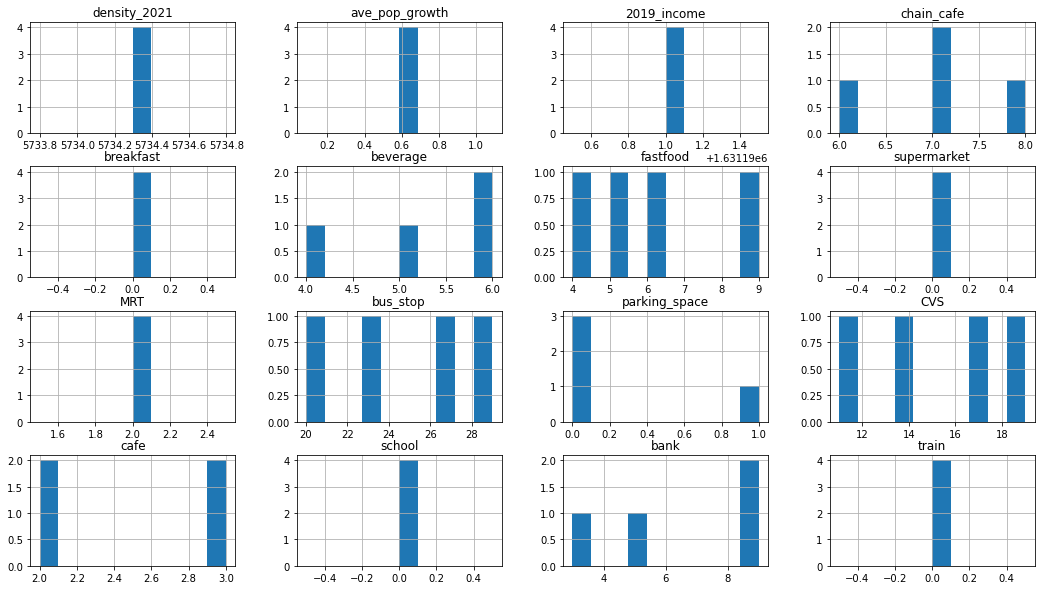

In [38]:
df_7.hist(figsize=(18, 10));

# 大部分人口密度(5734.297)
# 人口成長(0.5857702)
# 年收均值(1631191)
# 平均有(7)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(5.5)
# 速食餐廳(5.5)
# 超市(0)
# 捷運(2)
# 停車場(0)
# CVS(15.5)
# cafe(2.5)
# school(0)
# 銀行(7)
# 火車站(0)
# 巴士站至少(25)站

In [39]:
feature_o[feature_o['labels'] == 8]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
207,louisa,台北市松山區市民大道六段131號,25.049600,121.578755,27650.057475,-0.357518,2393420,4,0.0,4.0,...,1.0,7.0,2.0,9.0,4.0,0.0,1.0,1.0,台北市松山,8
209,louisa,台北市松山區市民大道六段131號1樓,25.049600,121.578755,27650.057475,-0.357518,2393420,4,0.0,4.0,...,1.0,7.0,2.0,9.0,4.0,0.0,1.0,1.0,台北市松山,8
398,stbks,台北市信義區松山路11號1樓,25.048456,121.578252,32744.437768,-1.758407,916899,3,0.0,2.0,...,1.0,8.0,2.0,8.0,2.0,0.0,2.0,1.0,台北市信義,8


In [40]:
df_8=feature_o[feature_o['labels'] == 8].loc[:,'density_2021':'train']
df_8.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000,3.000000e+00,3.000000,3.0,3.000000,3.0,3.0,3.0,3.000000,3.0,3.000000,3.000000,3.0,3.000000,3.0
mean,29348.184239,-0.824481,1.901246e+06,3.666667,0.0,3.333333,2.0,0.0,1.0,7.333333,2.0,8.666667,3.333333,0.0,1.333333,1.0
std,2941.241834,0.808803,8.524698e+05,0.577350,0.0,1.154701,0.0,0.0,0.0,0.577350,0.0,0.577350,1.154701,0.0,0.577350,0.0
min,27650.057475,-1.758407,9.168990e+05,3.000000,0.0,2.000000,2.0,0.0,1.0,7.000000,2.0,8.000000,2.000000,0.0,1.000000,1.0
25%,27650.057475,-1.057962,1.655160e+06,3.500000,0.0,3.000000,2.0,0.0,1.0,7.000000,2.0,8.500000,3.000000,0.0,1.000000,1.0
50%,27650.057475,-0.357518,2.393420e+06,4.000000,0.0,4.000000,2.0,0.0,1.0,7.000000,2.0,9.000000,4.000000,0.0,1.000000,1.0
75%,30197.247622,-0.357518,2.393420e+06,4.000000,0.0,4.000000,2.0,0.0,1.0,7.500000,2.0,9.000000,4.000000,0.0,1.500000,1.0
max,32744.437768,-0.357518,2.393420e+06,4.000000,0.0,4.000000,2.0,0.0,1.0,8.000000,2.0,9.000000,4.000000,0.0,2.000000,1.0


In [41]:
df_8.median()

density_2021      2.765006e+04
ave_pop_growth   -3.575181e-01
2019_income       2.393420e+06
chain_cafe        4.000000e+00
breakfast         0.000000e+00
beverage          4.000000e+00
fastfood          2.000000e+00
supermarket       0.000000e+00
MRT               1.000000e+00
bus_stop          7.000000e+00
parking_space     2.000000e+00
CVS               9.000000e+00
cafe              4.000000e+00
school            0.000000e+00
bank              1.000000e+00
train             1.000000e+00
dtype: float64

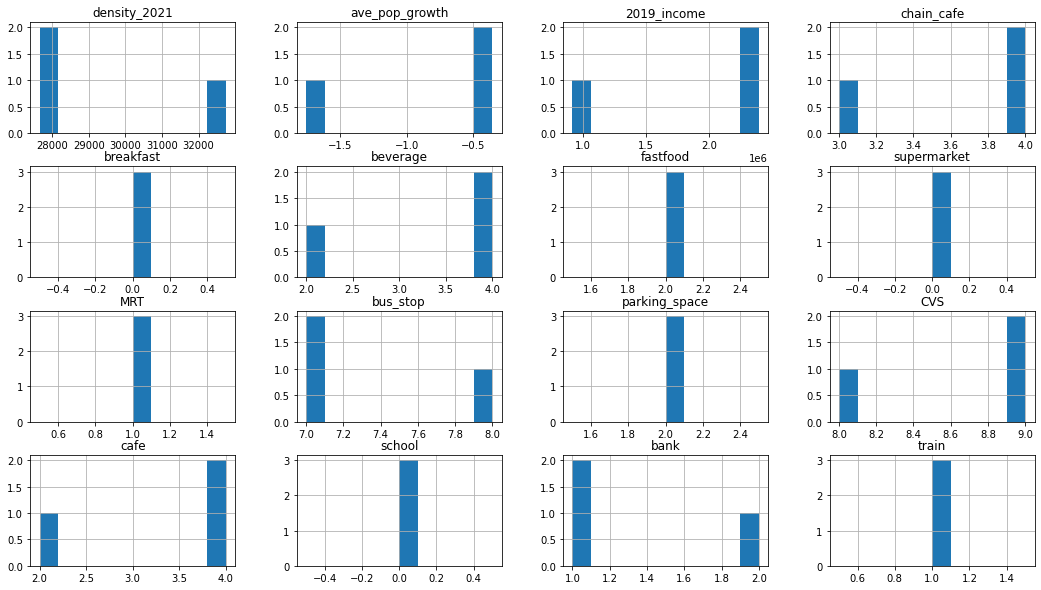

In [42]:
df_8.hist(figsize=(18, 10));

# 大部分人口密度(27650.06)
# 人口成長(-0.3575181)
# 年收均值(2393420)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(4)
# 速食餐廳(2)
# 超市(0)
# 捷運(1)
# 停車場(2)
# CVS(9)
# cafe(4)
# school(0)
# 銀行(1)
# 火車站(1)
# 巴士站至少(7)站

In [43]:
feature_o[feature_o['labels'] == 9]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
269,louisa,新北市新店區北宜路一段26號,24.957101,121.537961,18733.977285,2.921902,803548,4,0.0,1.0,...,1.0,84.0,3.0,4.0,0.0,0.0,0.0,0.0,新北市新店,9
509,stbks,新北市新店區北宜路一段2號,24.957871,121.537784,18733.977285,2.921902,803548,4,0.0,2.0,...,1.0,86.0,3.0,5.0,0.0,0.0,1.0,0.0,新北市新店,9
510,stbks,新北市新店區北宜路一段2號2F,24.957871,121.537784,18733.977285,2.921902,803548,4,0.0,2.0,...,1.0,86.0,3.0,5.0,0.0,0.0,1.0,0.0,新北市新店,9


In [44]:
df_9=feature_o[feature_o['labels'] == 9].loc[:,'density_2021':'train']
df_9.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000e+00,3.0,3.0,3.0,3.000000,3.0,3.0,3.0,3.000000,3.0,3.000000,3.0,3.0,3.000000,3.0
mean,18733.977285,2.921902e+00,803548.0,4.0,0.0,1.666667,0.0,0.0,1.0,85.333333,3.0,4.666667,0.0,0.0,0.666667,0.0
std,0.000000,5.438960e-16,0.0,0.0,0.0,0.577350,0.0,0.0,0.0,1.154701,0.0,0.577350,0.0,0.0,0.577350,0.0
min,18733.977285,2.921902e+00,803548.0,4.0,0.0,1.000000,0.0,0.0,1.0,84.000000,3.0,4.000000,0.0,0.0,0.000000,0.0
25%,18733.977285,2.921902e+00,803548.0,4.0,0.0,1.500000,0.0,0.0,1.0,85.000000,3.0,4.500000,0.0,0.0,0.500000,0.0
50%,18733.977285,2.921902e+00,803548.0,4.0,0.0,2.000000,0.0,0.0,1.0,86.000000,3.0,5.000000,0.0,0.0,1.000000,0.0
75%,18733.977285,2.921902e+00,803548.0,4.0,0.0,2.000000,0.0,0.0,1.0,86.000000,3.0,5.000000,0.0,0.0,1.000000,0.0
max,18733.977285,2.921902e+00,803548.0,4.0,0.0,2.000000,0.0,0.0,1.0,86.000000,3.0,5.000000,0.0,0.0,1.000000,0.0


In [45]:
df_9.median()

density_2021       18733.977285
ave_pop_growth         2.921902
2019_income       803548.000000
chain_cafe             4.000000
breakfast              0.000000
beverage               2.000000
fastfood               0.000000
supermarket            0.000000
MRT                    1.000000
bus_stop              86.000000
parking_space          3.000000
CVS                    5.000000
cafe                   0.000000
school                 0.000000
bank                   1.000000
train                  0.000000
dtype: float64

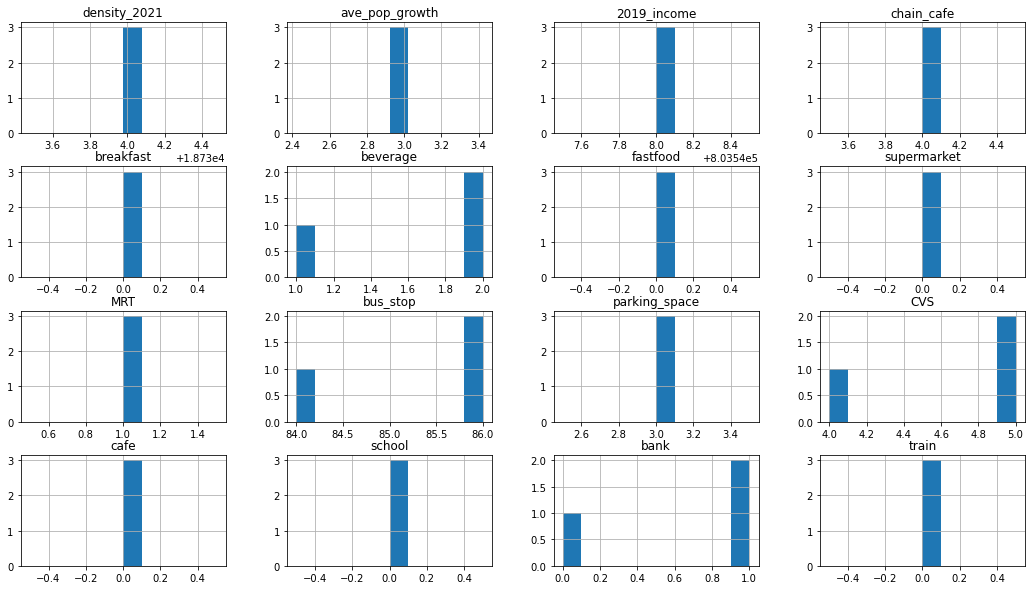

In [46]:
df_9.hist(figsize=(18, 10));

# 大部分人口密度(18733.977285)
# 人口成長(2.921902)
# 年收均值(803548)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(2)
# 速食餐廳(0)
# 超市(0)
# 捷運(1)
# 停車場(3)
# CVS(5)
# cafe(0)
# school(0)
# 銀行(1)
# 火車站(0)
# 巴士站至少(86)站

In [47]:
feature_o[feature_o['labels'] == 10]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
293,louisa,新北市板橋區縣民大道二段7號B1,25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0,新北市板橋,10
533,stbks,新北市板橋區縣民大道二段7號1F,25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0,新北市板橋,10
534,stbks,新北市板橋區縣民大道二段7號B1,25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0,新北市板橋,10
535,stbks,新北市板橋區縣民大道二段7號B1 (捷運3A出口),25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0,新北市板橋,10
536,stbks,新北市板橋區縣民大道二段7號B1(近台鐵及高鐵入口處),25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0,新北市板橋,10


In [48]:
df_10=feature_o[feature_o['labels'] == 10].loc[:,'density_2021':'train']
df_10.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0
std,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0
25%,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0
50%,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0
75%,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0
max,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0


In [49]:
df_10.median()

density_2021      2.035921e+04
ave_pop_growth    4.416789e-01
2019_income       3.018264e+06
chain_cafe        5.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               1.000000e+00
bus_stop          1.060000e+02
parking_space     5.000000e+00
CVS               7.000000e+00
cafe              2.000000e+00
school            0.000000e+00
bank              0.000000e+00
train             1.000000e+00
dtype: float64

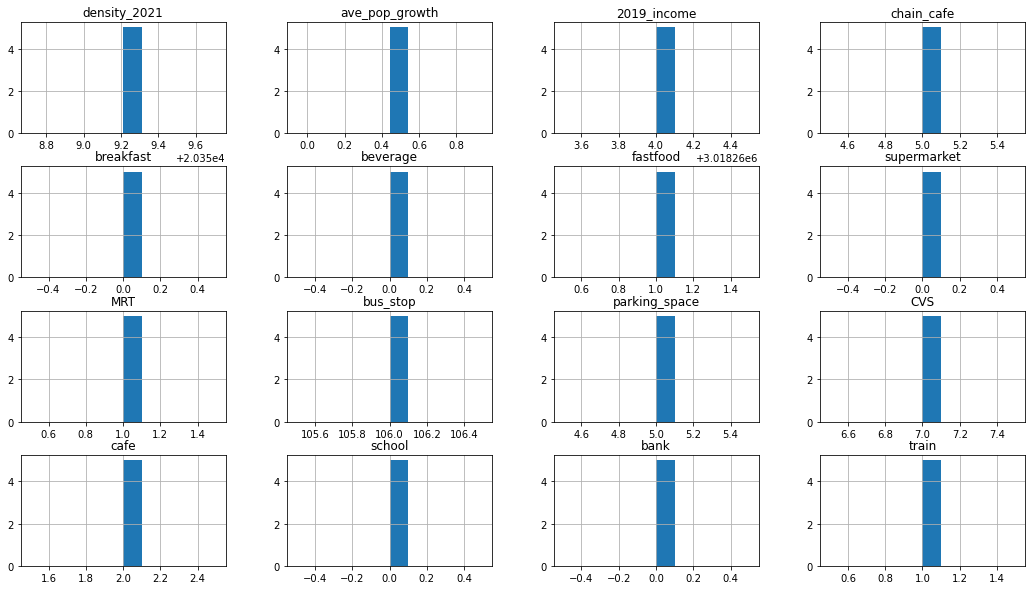

In [50]:
df_10.hist(figsize=(18, 10));

# 大部分人口密度(20359.21)
# 人口成長(0.4416789)
# 年收均值(1841575)
# 平均有(2)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(0)
# 速食餐廳(1)
# 超市(0)
# 捷運(2)
# 停車場(0)
# CVS(1)
# cafe(15)
# school(1)
# 銀行(6)
# 火車站(0)
# 巴士站至少(3)站

In [51]:
feature_o[feature_o['labels'] == 11]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
340,louisa,新北市淡水區民權路38號,25.137302,121.459812,26291.076671,-0.144794,2106064,3,1.0,5.0,...,1.0,70.0,0.0,2.0,2.0,0.0,2.0,0.0,新北市淡水,11
568,stbks,新北市淡水區民權路42號,25.137142,121.459822,26291.076671,-0.144794,2106064,3,1.0,5.0,...,1.0,70.0,0.0,2.0,2.0,0.0,2.0,0.0,新北市淡水,11
662,85 cafe,新北市淡水區民權路135號1樓,25.136519,121.460235,21860.100340,1.915813,1565601,3,1.0,6.0,...,1.0,70.0,0.0,4.0,2.0,0.0,3.0,0.0,新北市淡水,11


In [52]:
df_11=feature_o[feature_o['labels'] == 11].loc[:,'density_2021':'train']
df_11.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000,3.000000e+00,3.0,3.0,3.000000,3.0,3.000000,3.0,3.0,3.0,3.000000,3.0,3.0,3.000000,3.0
mean,24814.084561,0.542075,1.925910e+06,3.0,1.0,5.333333,1.0,1.333333,1.0,70.0,0.0,2.666667,2.0,0.0,2.333333,0.0
std,2558.225378,1.189692,3.120365e+05,0.0,0.0,0.577350,0.0,0.577350,0.0,0.0,0.0,1.154701,0.0,0.0,0.577350,0.0
min,21860.100340,-0.144794,1.565601e+06,3.0,1.0,5.000000,1.0,1.000000,1.0,70.0,0.0,2.000000,2.0,0.0,2.000000,0.0
25%,24075.588506,-0.144794,1.835832e+06,3.0,1.0,5.000000,1.0,1.000000,1.0,70.0,0.0,2.000000,2.0,0.0,2.000000,0.0
50%,26291.076671,-0.144794,2.106064e+06,3.0,1.0,5.000000,1.0,1.000000,1.0,70.0,0.0,2.000000,2.0,0.0,2.000000,0.0
75%,26291.076671,0.885509,2.106064e+06,3.0,1.0,5.500000,1.0,1.500000,1.0,70.0,0.0,3.000000,2.0,0.0,2.500000,0.0
max,26291.076671,1.915813,2.106064e+06,3.0,1.0,6.000000,1.0,2.000000,1.0,70.0,0.0,4.000000,2.0,0.0,3.000000,0.0


In [53]:
df_11.median()

density_2021      2.629108e+04
ave_pop_growth   -1.447942e-01
2019_income       2.106064e+06
chain_cafe        3.000000e+00
breakfast         1.000000e+00
beverage          5.000000e+00
fastfood          1.000000e+00
supermarket       1.000000e+00
MRT               1.000000e+00
bus_stop          7.000000e+01
parking_space     0.000000e+00
CVS               2.000000e+00
cafe              2.000000e+00
school            0.000000e+00
bank              2.000000e+00
train             0.000000e+00
dtype: float64

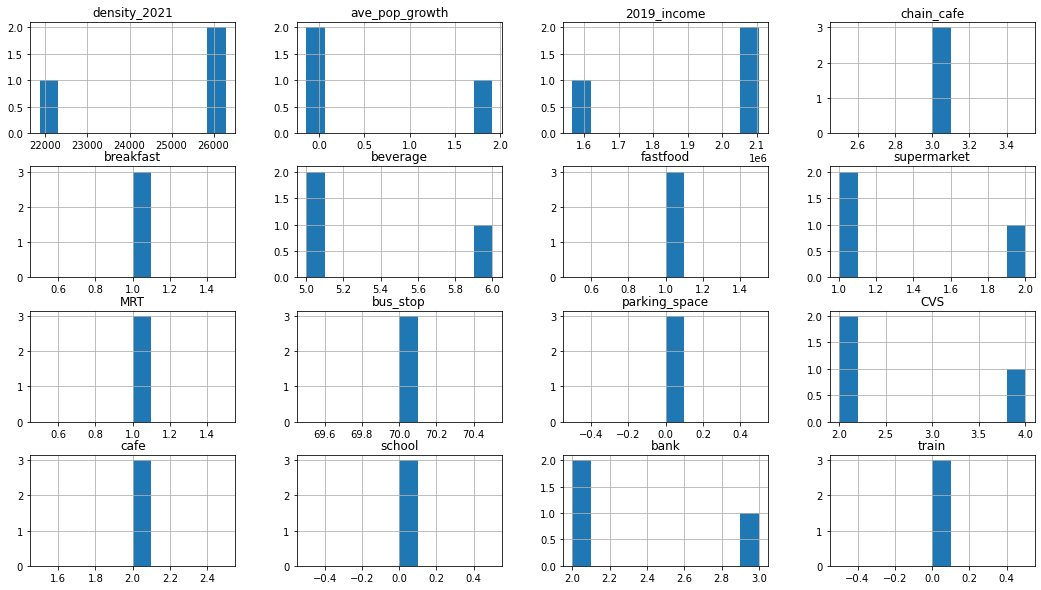

In [54]:
df_11.hist(figsize=(18, 10));

# 大部分人口密度(26291.08)
# 人口成長(-0.1447942)
# 年收均值(2106064)
# 平均有(3)間小型咖啡廳
# 沒有早餐店(1)
# 飲料店(5)
# 速食餐廳(1)
# 超市(1)
# 捷運(1)
# 停車場(0)
# CVS(2)
# cafe(2)
# school(0)
# 銀行(2)
# 火車站(0)
# 巴士站至少(70)站

In [55]:
feature_o[feature_o['labels'] == 12]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
108,louisa,台北市中山區北安路621巷49號,25.083020,121.546639,14193.578514,-1.957955,3928563,2,1.0,5.0,...,0.0,0.0,0.0,3.0,7.0,1.0,0.0,0.0,台北市中山,12
364,stbks,台北市中山區大直街70號1樓(位於實踐大學後門),25.083587,121.546234,14193.578514,-1.957955,3928563,2,1.0,5.0,...,0.0,0.0,0.0,3.0,5.0,1.0,0.0,0.0,台北市中山,12
393,stbks,台北市信義區吳興街252號1樓(台北醫學院第三醫療大樓一樓),25.026637,121.563638,27264.627040,-1.615284,2721242,2,2.0,5.0,...,0.0,0.0,1.0,5.0,4.0,1.0,0.0,0.0,台北市信義,12


In [56]:
df_12=feature_o[feature_o['labels'] == 12].loc[:,'density_2021':'train']
df_12.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000,3.000000e+00,3.0,3.000000,3.0,3.000000,3.000000,3.0,3.0,3.000000,3.000000,3.000000,3.0,3.0,3.0
mean,18550.594689,-1.843731,3.526123e+06,2.0,1.333333,5.0,1.333333,0.666667,0.0,0.0,0.333333,3.666667,5.333333,1.0,0.0,0.0
std,7546.573385,0.197841,6.970471e+05,0.0,0.577350,0.0,0.577350,1.154701,0.0,0.0,0.577350,1.154701,1.527525,0.0,0.0,0.0
min,14193.578514,-1.957955,2.721242e+06,2.0,1.000000,5.0,1.000000,0.000000,0.0,0.0,0.000000,3.000000,4.000000,1.0,0.0,0.0
25%,14193.578514,-1.957955,3.324902e+06,2.0,1.000000,5.0,1.000000,0.000000,0.0,0.0,0.000000,3.000000,4.500000,1.0,0.0,0.0
50%,14193.578514,-1.957955,3.928563e+06,2.0,1.000000,5.0,1.000000,0.000000,0.0,0.0,0.000000,3.000000,5.000000,1.0,0.0,0.0
75%,20729.102777,-1.786619,3.928563e+06,2.0,1.500000,5.0,1.500000,1.000000,0.0,0.0,0.500000,4.000000,6.000000,1.0,0.0,0.0
max,27264.627040,-1.615284,3.928563e+06,2.0,2.000000,5.0,2.000000,2.000000,0.0,0.0,1.000000,5.000000,7.000000,1.0,0.0,0.0


In [57]:
df_12.median()

density_2021      1.419358e+04
ave_pop_growth   -1.957955e+00
2019_income       3.928563e+06
chain_cafe        2.000000e+00
breakfast         1.000000e+00
beverage          5.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          0.000000e+00
parking_space     0.000000e+00
CVS               3.000000e+00
cafe              5.000000e+00
school            1.000000e+00
bank              0.000000e+00
train             0.000000e+00
dtype: float64

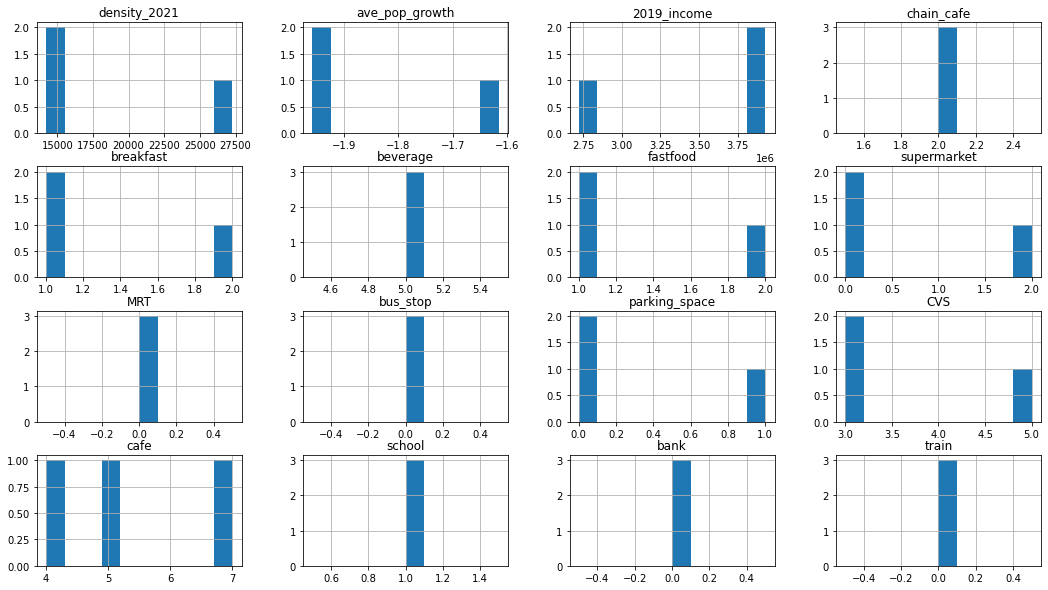

In [58]:
df_12.hist(figsize=(18, 10));

# 大部分人口密度(14193.58)
# 人口成長(-1.957955)
# 年收均值(3928563)
# 平均有(2)間小型咖啡廳
# 沒有早餐店(1)
# 飲料店(5)
# 速食餐廳(1)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(3)
# cafe(5)
# school(1)
# 銀行(0)
# 火車站(0)
# 巴士站至少(0)站

In [59]:
feature_o[feature_o['labels'] == 13]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
371,stbks,台北市中正區忠孝西路一段49號B1,25.047066,121.517670,5734.296784,0.58577,1631191,4,0.0,0.0,...,2.0,31.0,0.0,16.0,1.0,0.0,1.0,1.0,台北市中正,13
380,stbks,台北市中正區北平西路3號2樓,25.047176,121.517058,5734.296784,0.58577,1631191,6,0.0,0.0,...,2.0,35.0,0.0,18.0,1.0,0.0,1.0,1.0,台北市中正,13
384,stbks,台北市中正區忠孝西路一段47號B1,25.046880,121.516761,5734.296784,0.58577,1631191,6,0.0,1.0,...,2.0,35.0,0.0,19.0,1.0,0.0,2.0,1.0,台北市中正,13


In [60]:
df_13=feature_o[feature_o['labels'] == 13].loc[:,'density_2021':'train']
df_13.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.00000,3.0,3.000000,3.0,3.000000,3.000000,3.0,3.0,3.000000,3.0,3.000000,3.0,3.0,3.000000,3.0
mean,5734.296784,0.58577,1631191.0,5.333333,0.0,0.333333,6.666667,0.0,2.0,33.666667,0.0,17.666667,1.0,0.0,1.333333,1.0
std,0.000000,0.00000,0.0,1.154701,0.0,0.577350,1.527525,0.0,0.0,2.309401,0.0,1.527525,0.0,0.0,0.577350,0.0
min,5734.296784,0.58577,1631191.0,4.000000,0.0,0.000000,5.000000,0.0,2.0,31.000000,0.0,16.000000,1.0,0.0,1.000000,1.0
25%,5734.296784,0.58577,1631191.0,5.000000,0.0,0.000000,6.000000,0.0,2.0,33.000000,0.0,17.000000,1.0,0.0,1.000000,1.0
50%,5734.296784,0.58577,1631191.0,6.000000,0.0,0.000000,7.000000,0.0,2.0,35.000000,0.0,18.000000,1.0,0.0,1.000000,1.0
75%,5734.296784,0.58577,1631191.0,6.000000,0.0,0.500000,7.500000,0.0,2.0,35.000000,0.0,18.500000,1.0,0.0,1.500000,1.0
max,5734.296784,0.58577,1631191.0,6.000000,0.0,1.000000,8.000000,0.0,2.0,35.000000,0.0,19.000000,1.0,0.0,2.000000,1.0


In [61]:
df_13.median()

density_2021      5.734297e+03
ave_pop_growth    5.857702e-01
2019_income       1.631191e+06
chain_cafe        6.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          7.000000e+00
supermarket       0.000000e+00
MRT               2.000000e+00
bus_stop          3.500000e+01
parking_space     0.000000e+00
CVS               1.800000e+01
cafe              1.000000e+00
school            0.000000e+00
bank              1.000000e+00
train             1.000000e+00
dtype: float64

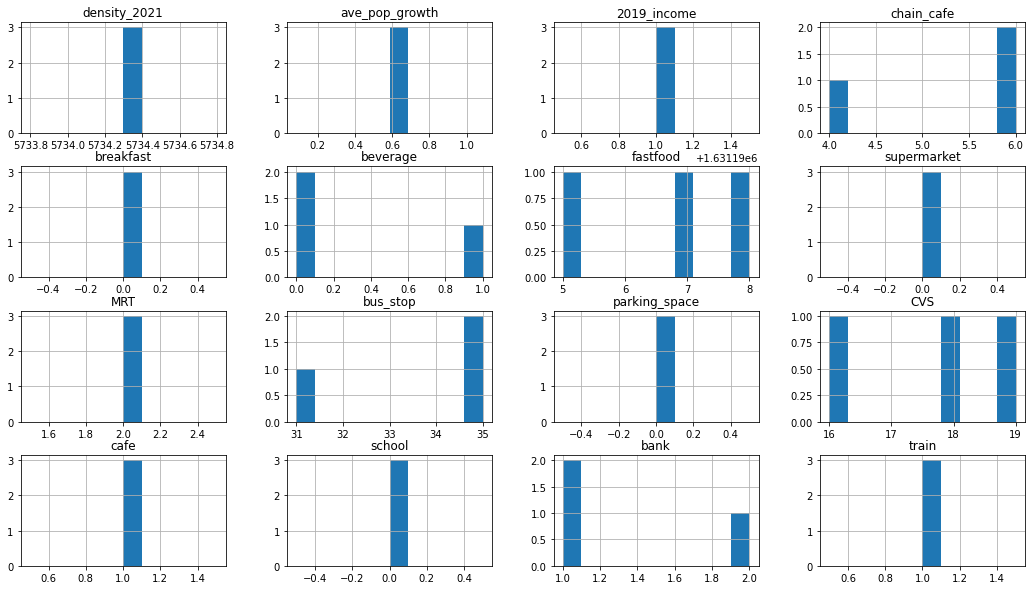

In [62]:
df_13.hist(figsize=(18, 10));

# 大部分人口密度(5734.297)
# 人口成長(0.5857702)
# 年收均值(1631191)
# 平均有(6)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(0)
# 速食餐廳(7)
# 超市(0)
# 捷運(2)
# 停車場(0)
# CVS(18)
# cafe(1)
# school(0)
# 銀行(1)
# 火車站(1)
# 巴士站至少(35)站

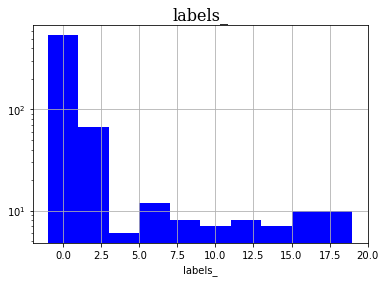

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [63]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import pickle
from joblib import dump, load

scaler = StandardScaler()
X = np.array(scaler.fit_transform(feature))
clustering = DBSCAN(eps=3, metric='l1',algorithm='kd_tree' ,min_samples=3).fit(X)

# 存模型
# clf = pickle.dumps(clustering)

# dump(clf, 'nearby100m.joblib') 

n, bins, patches = plt.hist(clustering.labels_, facecolor='b',log=True)

plt.xlabel('labels_')

font = {'family': 'serif',
    'weight': 'normal',
    'size': 16,
    }

plt.title('labels_',fontdict=font)
plt.grid(True)
plt.show()
feature_o['labels'] = list(clustering.labels_)
set(clustering.labels_)

In [64]:
feature_o[feature_o['labels'] == -1]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
1,cama,台北市中山區民生東路二段133號,25.058088,121.532388,34199.348503,-1.879027,1857272,4,0.0,0.0,...,1.0,29.0,0.0,3.0,6.0,0.0,8.0,0.0,台北市中山,-1
3,cama,台北市中山區長春路133-5號,25.054950,121.531175,30029.689819,-0.402234,2750941,1,1.0,1.0,...,0.0,0.0,1.0,3.0,3.0,0.0,8.0,0.0,台北市中山,-1
5,cama,台北市中山區南京東路三段82號,25.051750,121.539348,21085.129310,0.000600,3990206,1,0.0,0.0,...,0.0,14.0,0.0,7.0,5.0,0.0,12.0,0.0,台北市中山,-1
6,cama,台北市中山區民生東路一段2號,25.057835,121.523249,40836.413198,-0.122100,2793229,2,2.0,1.0,...,0.0,6.0,0.0,6.0,5.0,0.0,4.0,0.0,台北市中山,-1
7,cama,台北市中山區長安東路一段19號,25.049633,121.522983,24953.495137,-0.808010,1859218,1,0.0,0.0,...,0.0,0.0,0.0,3.0,10.0,0.0,6.0,0.0,台北市中山,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,85 cafe,新北市瑞芳區明燈路三段35號,25.107800,121.807171,21939.680212,-1.170827,494705,2,0.0,3.0,...,0.0,69.0,4.0,4.0,0.0,0.0,2.0,1.0,新北市瑞芳,-1
666,85 cafe,新北市蘆洲區復興路21號,25.087335,121.475661,52188.165157,-0.686037,761042,1,2.0,1.0,...,0.0,22.0,2.0,3.0,0.0,0.0,1.0,0.0,新北市蘆洲,-1
667,85 cafe,新北市蘆洲區長安街225號1樓,25.082557,121.459412,60483.650968,-0.514861,975373,1,0.0,2.0,...,0.0,28.0,0.0,5.0,2.0,0.0,1.0,0.0,新北市蘆洲,-1
668,85 cafe,新北市蘆洲區光華路174號,25.082182,121.465159,33846.823431,-0.448332,904809,1,0.0,3.0,...,0.0,69.0,0.0,1.0,0.0,0.0,0.0,0.0,新北市蘆洲,-1


In [65]:
dfz_i1=feature_o[feature_o['labels'] == -1].loc[:,'density_2021':'train']
dfz_i1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,534.000000,534.000000,5.340000e+02,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,31289.905605,-0.448476,2.469354e+06,1.926966,0.947566,1.473783,0.868914,0.604869,0.314607,29.681648,0.638577,4.035581,2.561798,0.078652,3.953184,0.035581
std,18283.340539,1.980939,1.600783e+06,1.114590,1.322721,1.656831,1.185294,0.859368,0.601976,36.628398,1.130546,2.635564,2.961751,0.276322,4.355202,0.185416
min,1318.101678,-12.785775,8.480800e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17233.254570,-1.395184,1.336100e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,30029.689819,-0.792518,2.133014e+06,2.000000,0.500000,1.000000,1.000000,0.000000,0.000000,16.500000,0.000000,3.000000,2.000000,0.000000,3.000000,0.000000
75%,42856.516612,0.026894,3.118830e+06,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,45.000000,1.000000,5.000000,4.000000,0.000000,6.000000,0.000000
max,110994.346742,12.415476,1.057882e+07,8.000000,7.000000,9.000000,9.000000,4.000000,2.000000,281.000000,6.000000,19.000000,24.000000,2.000000,29.000000,1.000000


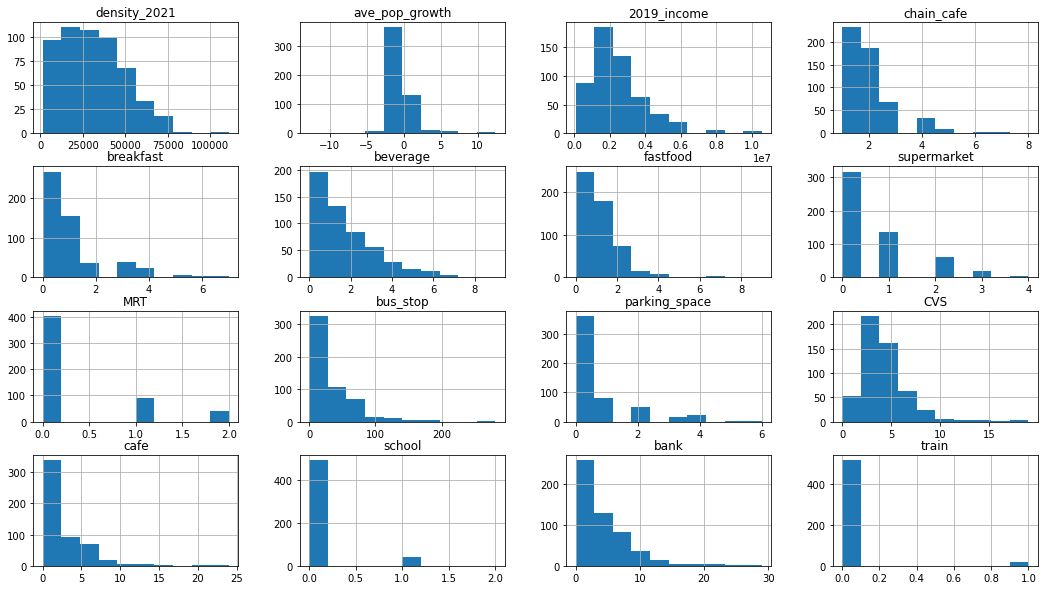

In [66]:
dfz_i1.hist(figsize=(18, 10));

# 大部分人口密度(30029.69)
# 人口大多緩步負成長(-0.7925184)
# 年收均值(2133014)
# 平均有(2)間小型咖啡廳
# 沒有早餐店(0.5)
# 飲料店(1)
# 速食餐廳(1)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(3)
# cafe(2)
# school(0)
# 銀行(3)
# 火車站(0)
# 巴士站至少(16.5)站

In [67]:
dfz_i1.median()

density_2021      3.002969e+04
ave_pop_growth   -7.925184e-01
2019_income       2.133014e+06
chain_cafe        2.000000e+00
breakfast         5.000000e-01
beverage          1.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          1.650000e+01
parking_space     0.000000e+00
CVS               3.000000e+00
cafe              2.000000e+00
school            0.000000e+00
bank              3.000000e+00
train             0.000000e+00
dtype: float64

In [68]:
feature_o[feature_o['labels'] == 0]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
4,cama,台北市中山區民權東路二段97號,25.062712,121.532380,37267.488548,-1.043902,1839588,2,0.0,0.0,...,0.0,35.0,0.0,5.0,7.0,0.0,2.0,0.0,台北市中山,0
221,louisa,台北市萬華區桂林路26號,25.037604,121.505397,43070.467377,-1.620729,1961003,2,0.0,0.0,...,0.0,36.0,0.0,1.0,5.0,0.0,2.0,0.0,台北市萬華,0
353,stbks,台北市中山區中山北路二段171號1~2樓,25.062978,121.522842,38794.344953,0.075795,2117078,2,0.0,0.0,...,0.0,28.0,0.0,4.0,6.0,0.0,5.0,0.0,台北市中山,0
480,stbks,台北市萬華區桂林路1號,25.037675,121.506304,43070.467377,-1.620729,1961003,2,0.0,0.0,...,0.0,52.0,0.0,1.0,4.0,0.0,2.0,0.0,台北市萬華,0


In [69]:
dfz_0=feature_o[feature_o['labels'] == 0].loc[:,'density_2021':'train']
dfz_0.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.000000e+00,4.0,4.0,4.0,4.0,4.0,4.0,4.000000,4.0,4.000000,4.000000,4.0,4.00,4.0
mean,40550.692064,-1.052391,1.969668e+06,2.0,0.0,0.0,1.0,0.0,0.0,37.750000,0.0,2.750000,5.500000,0.0,2.75,0.0
std,2975.607263,0.799769,1.137258e+05,0.0,0.0,0.0,0.0,0.0,0.0,10.144785,0.0,2.061553,1.290994,0.0,1.50,0.0
min,37267.488548,-1.620729,1.839588e+06,2.0,0.0,0.0,1.0,0.0,0.0,28.000000,0.0,1.000000,4.000000,0.0,2.00,0.0
25%,38412.630852,-1.620729,1.930649e+06,2.0,0.0,0.0,1.0,0.0,0.0,33.250000,0.0,1.000000,4.750000,0.0,2.00,0.0
50%,40932.406165,-1.332315,1.961003e+06,2.0,0.0,0.0,1.0,0.0,0.0,35.500000,0.0,2.500000,5.500000,0.0,2.00,0.0
75%,43070.467377,-0.763978,2.000022e+06,2.0,0.0,0.0,1.0,0.0,0.0,40.000000,0.0,4.250000,6.250000,0.0,2.75,0.0
max,43070.467377,0.075795,2.117078e+06,2.0,0.0,0.0,1.0,0.0,0.0,52.000000,0.0,5.000000,7.000000,0.0,5.00,0.0


,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
4,cama,台北市中山區民權東路二段97號,25.062712,121.532380,37267.488548,-1.043902,1839588,2,0.0,0.0,...,0.0,35.0,0.0,5.0,7.0,0.0,2.0,0.0,台北市中山,0
221,louisa,台北市萬華區桂林路26號,25.037604,121.505397,43070.467377,-1.620729,1961003,2,0.0,0.0,...,0.0,36.0,0.0,1.0,5.0,0.0,2.0,0.0,台北市萬華,0
353,stbks,台北市中山區中山北路二段171號1~2樓,25.062978,121.522842,38794.344953,0.075795,2117078,2,0.0,0.0,...,0.0,28.0,0.0,4.0,6.0,0.0,5.0,0.0,台北市中山,0
480,stbks,台北市萬華區桂林路1號,25.037675,121.506304,43070.467377,-1.620729,1961003,2,0.0,0.0,...,0.0,52.0,0.0,1.0,4.0,0.0,2.0,0.0,台北市萬華,0


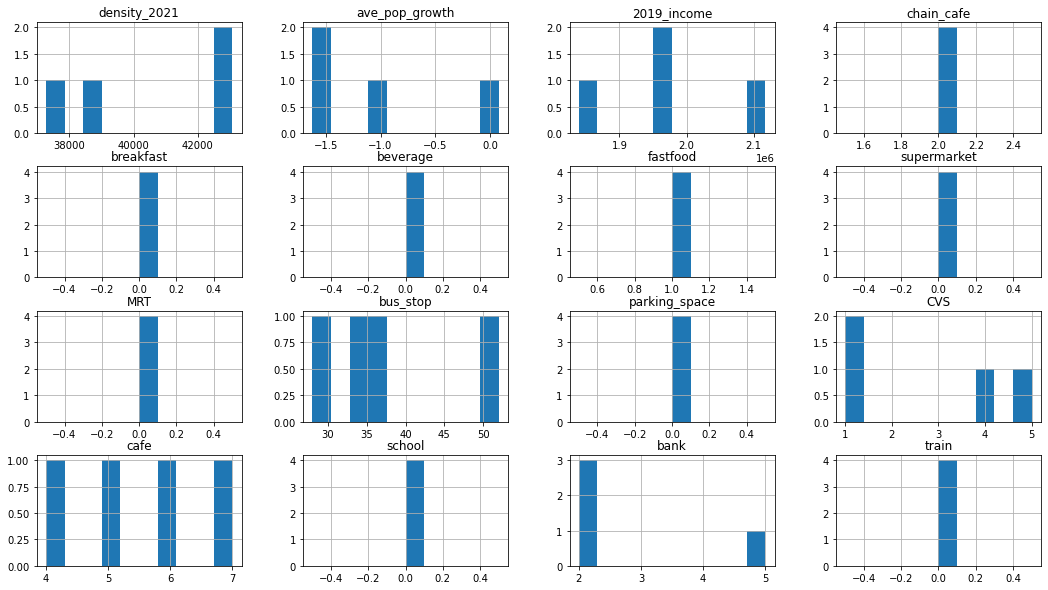

In [70]:
dfz_0.hist(figsize=(18, 10));
feature_o[feature_o['labels'] == 0]
# 大部分人口密度(40932.41)
# 人口大多緩步負成長(-1.332315)
# 年收均值(1961003)
# 平均有(2)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(0)
# 速食餐廳(1)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(2.5)
# cafe(5.5)
# school(0)
# 銀行(2)
# 火車站(0)
# 巴士站至少(35.5)站

In [71]:
dfz_0.median()

density_2021      4.093241e+04
ave_pop_growth   -1.332315e+00
2019_income       1.961003e+06
chain_cafe        2.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          3.550000e+01
parking_space     0.000000e+00
CVS               2.500000e+00
cafe              5.500000e+00
school            0.000000e+00
bank              2.000000e+00
train             0.000000e+00
dtype: float64

In [72]:
dfz_1=feature_o[feature_o['labels'] == 1].loc[:,'density_2021':'train']
dfz_1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,62.000000,62.000000,6.200000e+01,62.000000,62.00000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.0
mean,11177.905697,0.073611,2.048998e+06,1.306452,0.16129,0.306452,0.209677,0.064516,0.048387,10.709677,0.096774,2.387097,0.645161,0.0,1.274194,0.0
std,10331.913321,3.038025,9.416388e+05,0.560699,0.45063,0.560699,0.516517,0.247676,0.216335,14.533610,0.298064,1.529543,0.748699,0.0,1.984938,0.0
min,620.705292,-2.877520,4.607530e+05,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,3041.353754,-1.313560,1.287466e+06,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0
50%,7135.346179,-0.874119,2.215060e+06,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,5.500000,0.000000,2.000000,0.500000,0.0,0.000000,0.0
75%,15663.485204,-0.096867,2.557267e+06,1.750000,0.00000,0.750000,0.000000,0.000000,0.000000,13.500000,0.000000,3.000000,1.000000,0.0,2.000000,0.0
max,42770.122466,9.949524,5.937431e+06,3.000000,2.00000,2.000000,2.000000,1.000000,1.000000,66.000000,1.000000,7.000000,3.000000,0.0,9.000000,0.0


In [73]:
feature_o[feature_o['labels'] == 1]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
26,cama,台北市內湖區舊宗路一段128號,25.060963,121.578320,2354.824015,-1.609078,2436938,2,0.0,0.0,...,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,台北市內湖,1
29,cama,台北市北投區立德路150-3號b1F,25.127317,121.473419,2818.032488,-1.138621,2557267,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,台北市北投,1
31,cama,台北市北投區立功街76號,25.124789,121.469185,2818.032488,-1.138621,2557267,1,0.0,0.0,...,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,台北市北投,1
32,cama,台北市北投區北投路一段59號,25.125938,121.500675,1440.067974,-1.805974,2105370,1,1.0,0.0,...,1.0,3.0,0.0,3.0,1.0,0.0,0.0,0.0,台北市北投,1
58,cama,新北市中和區中正路903之1號,25.005901,121.483748,5714.260090,9.949524,2230550,2,0.0,0.0,...,0.0,10.0,0.0,3.0,0.0,0.0,2.0,0.0,新北市中和,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,85 cafe,新北市板橋區溪北路172號,24.987883,121.430970,13050.626993,-1.086113,1075070,1,1.0,1.0,...,0.0,10.0,0.0,2.0,0.0,0.0,0.0,0.0,新北市板橋,1
660,85 cafe,新北市泰山區明志路一段519號,25.054047,121.430419,3822.290307,-0.329240,1037954,1,2.0,0.0,...,0.0,49.0,0.0,2.0,0.0,0.0,0.0,0.0,新北市泰山,1
665,85 cafe,新北市萬里區港東路65-1號,25.204034,121.687852,620.705292,-1.277785,460753,1,0.0,1.0,...,0.0,16.0,0.0,2.0,0.0,0.0,0.0,0.0,新北市萬里,1
669,85 cafe,新北市蘆洲區民族路321號,25.091487,121.474329,15354.918545,-0.271195,2131815,1,0.0,2.0,...,0.0,19.0,0.0,3.0,1.0,0.0,0.0,0.0,新北市蘆洲,1


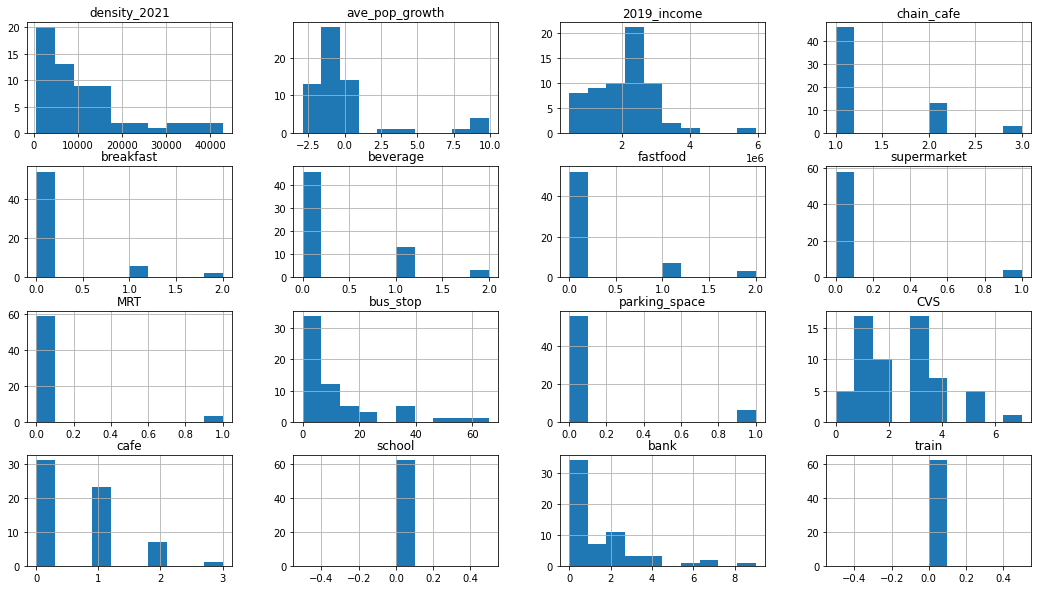

In [74]:
dfz_1.hist(figsize=(18, 10));

# 大部分人口密度(7135.346)
# 人口大多緩步負成長(-0.8741193)
# 年收均值(2215060)
# 平均有(1)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(0)
# 速食餐廳(0)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(2)
# cafe(0.5)
# school(0)
# 銀行(0)
# 火車站(0)
# 巴士站至少(5.5)站

In [75]:
dfz_1.median()

density_2021      7.135346e+03
ave_pop_growth   -8.741193e-01
2019_income       2.215060e+06
chain_cafe        1.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          0.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          5.500000e+00
parking_space     0.000000e+00
CVS               2.000000e+00
cafe              5.000000e-01
school            0.000000e+00
bank              0.000000e+00
train             0.000000e+00
dtype: float64

In [76]:
feature_o[feature_o['labels'] == 2]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
35,cama,台北市南港區忠孝東路七段371號B1,25.052571,121.607496,2156.336462,-2.364998,992878,5,0.0,2.0,...,1.0,10.0,0.0,3.0,0.0,0.0,1.0,1.0,台北市南港,2
162,louisa,台北市南港區忠孝東路七段369號1F,25.052669,121.607208,2156.336462,-2.364998,992878,5,0.0,2.0,...,1.0,18.0,0.0,4.0,0.0,0.0,1.0,1.0,台北市南港,2
163,louisa,台北市南港區忠孝東路7段369號2樓,25.052669,121.607208,2156.336462,-2.364998,992878,5,0.0,2.0,...,1.0,18.0,0.0,4.0,0.0,0.0,1.0,1.0,台北市南港,2
421,stbks,台北市南港區忠孝東路七段371號B2,25.052571,121.607496,2156.336462,-2.364998,992878,5,0.0,2.0,...,1.0,10.0,0.0,3.0,0.0,0.0,1.0,1.0,台北市南港,2
422,stbks,台北市南港區忠孝東路7段359號A棟1樓,25.052512,121.606056,2156.336462,-2.364998,992878,5,0.0,2.0,...,1.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,台北市南港,2


In [77]:
dfz_2=feature_o[feature_o['labels'] == 2].loc[:,'density_2021':'train']
dfz_2.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.0,5.0,5.0,5.0,5.000000,5.0,5.0,5.00000,5.0,5.000000,5.0,5.0,5.0,5.0
mean,2156.336462,-2.364998,992878.0,5.0,0.0,2.0,0.200000,0.0,1.0,13.20000,0.0,3.600000,0.0,0.0,1.0,1.0
std,0.000000,0.000000,0.0,0.0,0.0,0.0,0.447214,0.0,0.0,4.38178,0.0,0.547723,0.0,0.0,0.0,0.0
min,2156.336462,-2.364998,992878.0,5.0,0.0,2.0,0.000000,0.0,1.0,10.00000,0.0,3.000000,0.0,0.0,1.0,1.0
25%,2156.336462,-2.364998,992878.0,5.0,0.0,2.0,0.000000,0.0,1.0,10.00000,0.0,3.000000,0.0,0.0,1.0,1.0
50%,2156.336462,-2.364998,992878.0,5.0,0.0,2.0,0.000000,0.0,1.0,10.00000,0.0,4.000000,0.0,0.0,1.0,1.0
75%,2156.336462,-2.364998,992878.0,5.0,0.0,2.0,0.000000,0.0,1.0,18.00000,0.0,4.000000,0.0,0.0,1.0,1.0
max,2156.336462,-2.364998,992878.0,5.0,0.0,2.0,1.000000,0.0,1.0,18.00000,0.0,4.000000,0.0,0.0,1.0,1.0


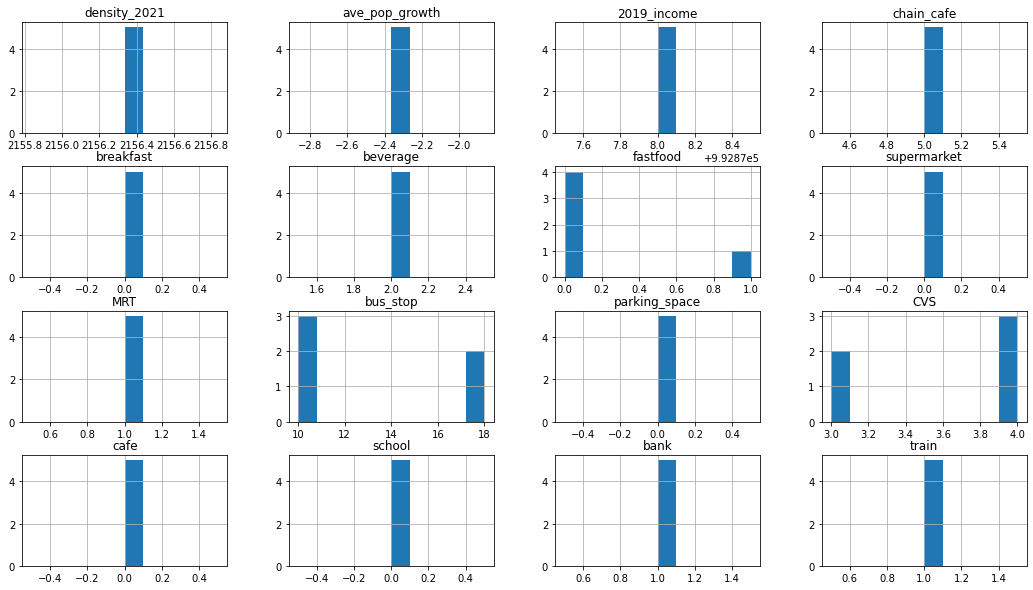

In [78]:
dfz_2.hist(figsize=(18, 10));

# 大部分人口密度(2156.336462)
# 人口大多緩步負成長(-2.364998)
# 年收均值(992878)
# 平均有(5)間小型咖啡廳
# 早餐店(0)
# 飲料店(2)
# 速食餐廳(0)
# 超市(0)
# 捷運(1)
# 停車場(0)
# CVS(4)
# cafe(0)
# school(0)
# 銀行(1)
# 火車站(1)
# 巴士站至少(10)站

In [79]:
dfz_2.median()

density_2021        2156.336462
ave_pop_growth        -2.364998
2019_income       992878.000000
chain_cafe             5.000000
breakfast              0.000000
beverage               2.000000
fastfood               0.000000
supermarket            0.000000
MRT                    1.000000
bus_stop              10.000000
parking_space          0.000000
CVS                    4.000000
cafe                   0.000000
school                 0.000000
bank                   1.000000
train                  1.000000
dtype: float64

In [80]:
feature_o[feature_o['labels'] == 3]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
62,cama,新北市新店區民權路96號1樓,24.983029,121.536620,5239.354458,-1.462681,941190,3,0.0,1.0,...,0.0,45.0,1.0,5.0,2.0,0.0,6.0,0.0,新北市新店,3
262,louisa,新北市新店區建國路268號,24.983082,121.537662,5239.354458,-1.462681,941190,3,0.0,0.0,...,0.0,70.0,1.0,4.0,2.0,0.0,8.0,0.0,新北市新店,3
514,stbks,新北市新店區民權路78號,24.983059,121.537443,5239.354458,-1.462681,941190,3,0.0,1.0,...,0.0,72.0,1.0,4.0,2.0,0.0,8.0,0.0,新北市新店,3


In [81]:
dfz_3=feature_o[feature_o['labels'] == 3].loc[:,'density_2021':'train']
dfz_3.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000e+00,3.0,3.0,3.0,3.000000,3.0,3.0,3.0,3.000000,3.0,3.000000,3.0,3.0,3.000000,3.0
mean,5239.354458,-1.462681e+00,941190.0,3.0,0.0,0.666667,0.0,0.0,0.0,62.333333,1.0,4.333333,2.0,0.0,7.333333,0.0
std,0.000000,2.719480e-16,0.0,0.0,0.0,0.577350,0.0,0.0,0.0,15.044379,0.0,0.577350,0.0,0.0,1.154701,0.0
min,5239.354458,-1.462681e+00,941190.0,3.0,0.0,0.000000,0.0,0.0,0.0,45.000000,1.0,4.000000,2.0,0.0,6.000000,0.0
25%,5239.354458,-1.462681e+00,941190.0,3.0,0.0,0.500000,0.0,0.0,0.0,57.500000,1.0,4.000000,2.0,0.0,7.000000,0.0
50%,5239.354458,-1.462681e+00,941190.0,3.0,0.0,1.000000,0.0,0.0,0.0,70.000000,1.0,4.000000,2.0,0.0,8.000000,0.0
75%,5239.354458,-1.462681e+00,941190.0,3.0,0.0,1.000000,0.0,0.0,0.0,71.000000,1.0,4.500000,2.0,0.0,8.000000,0.0
max,5239.354458,-1.462681e+00,941190.0,3.0,0.0,1.000000,0.0,0.0,0.0,72.000000,1.0,5.000000,2.0,0.0,8.000000,0.0


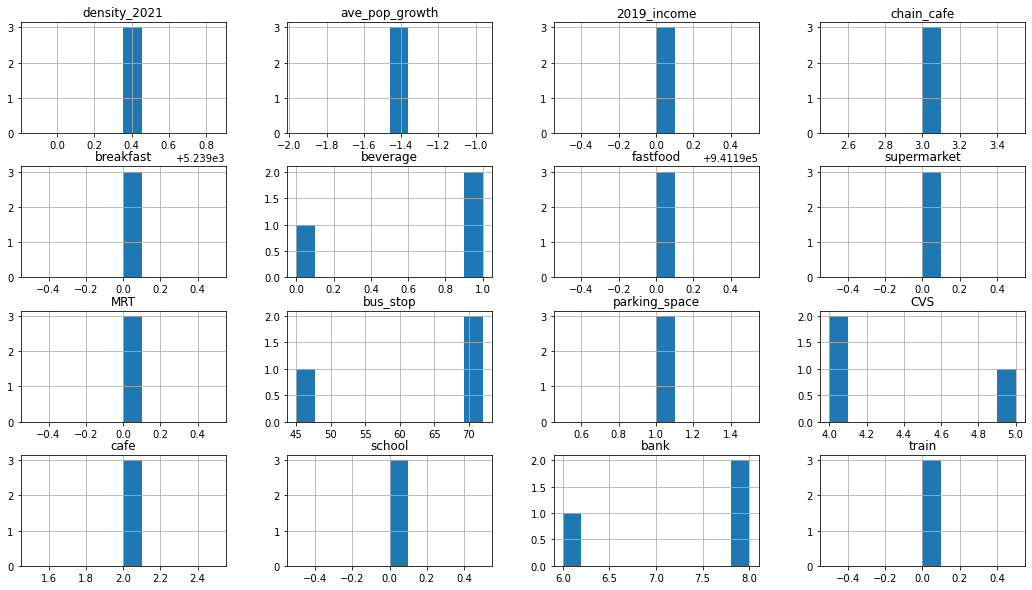

In [82]:
dfz_3.hist(figsize=(18, 10));

# 大部分人口密度(5239.354458)
# 人口大多緩步負成長(-1.462681)
# 年收均值(941190)
# 平均有(3)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(1)
# 速食餐廳(0)
# 超市(0)
# 捷運(0)
# 停車場(1)
# CVS(4)
# cafe(2)
# school(0)
# 銀行(8)
# 火車站(0)
# 巴士站至少(70)站

In [83]:
dfz_3.median()

density_2021        5239.354458
ave_pop_growth        -1.462681
2019_income       941190.000000
chain_cafe             3.000000
breakfast              0.000000
beverage               1.000000
fastfood               0.000000
supermarket            0.000000
MRT                    0.000000
bus_stop              70.000000
parking_space          1.000000
CVS                    4.000000
cafe                   2.000000
school                 0.000000
bank                   8.000000
train                  0.000000
dtype: float64

In [84]:
feature_o[feature_o['labels'] == 3]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
62,cama,新北市新店區民權路96號1樓,24.983029,121.536620,5239.354458,-1.462681,941190,3,0.0,1.0,...,0.0,45.0,1.0,5.0,2.0,0.0,6.0,0.0,新北市新店,3
262,louisa,新北市新店區建國路268號,24.983082,121.537662,5239.354458,-1.462681,941190,3,0.0,0.0,...,0.0,70.0,1.0,4.0,2.0,0.0,8.0,0.0,新北市新店,3
514,stbks,新北市新店區民權路78號,24.983059,121.537443,5239.354458,-1.462681,941190,3,0.0,1.0,...,0.0,72.0,1.0,4.0,2.0,0.0,8.0,0.0,新北市新店,3


In [85]:
dfz_4=feature_o[feature_o['labels'] == 4].loc[:,'density_2021':'train']
dfz_4.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000,3.0,3.000000,3.0,3.000000,3.0,3.0,3.0,3.000000,3.0,3.0,3.0,3.0,3.000000,3.0
mean,30986.774138,-0.368677,759779.0,4.666667,3.0,2.333333,0.0,0.0,0.0,31.000000,0.0,4.0,1.0,0.0,5.333333,0.0
std,0.000000,0.000000,0.0,0.577350,0.0,1.154701,0.0,0.0,0.0,6.928203,0.0,0.0,0.0,0.0,0.577350,0.0
min,30986.774138,-0.368677,759779.0,4.000000,3.0,1.000000,0.0,0.0,0.0,23.000000,0.0,4.0,1.0,0.0,5.000000,0.0
25%,30986.774138,-0.368677,759779.0,4.500000,3.0,2.000000,0.0,0.0,0.0,29.000000,0.0,4.0,1.0,0.0,5.000000,0.0
50%,30986.774138,-0.368677,759779.0,5.000000,3.0,3.000000,0.0,0.0,0.0,35.000000,0.0,4.0,1.0,0.0,5.000000,0.0
75%,30986.774138,-0.368677,759779.0,5.000000,3.0,3.000000,0.0,0.0,0.0,35.000000,0.0,4.0,1.0,0.0,5.500000,0.0
max,30986.774138,-0.368677,759779.0,5.000000,3.0,3.000000,0.0,0.0,0.0,35.000000,0.0,4.0,1.0,0.0,6.000000,0.0


In [86]:
feature_o[feature_o['labels'] == 4]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
63,cama,新北市板橋區三民路二段67號,25.017021,121.479450,30986.774138,-0.368677,759779,5,3.0,3.0,...,0.0,35.0,0.0,4.0,1.0,0.0,5.0,0.0,新北市板橋,4
64,cama,新北市板橋區三民路二段67號1樓,25.017021,121.479450,30986.774138,-0.368677,759779,5,3.0,3.0,...,0.0,35.0,0.0,4.0,1.0,0.0,5.0,0.0,新北市板橋,4
303,louisa,新北市板橋區三民路二段101號,25.016175,121.479378,30986.774138,-0.368677,759779,4,3.0,1.0,...,0.0,23.0,0.0,4.0,1.0,0.0,6.0,0.0,新北市板橋,4


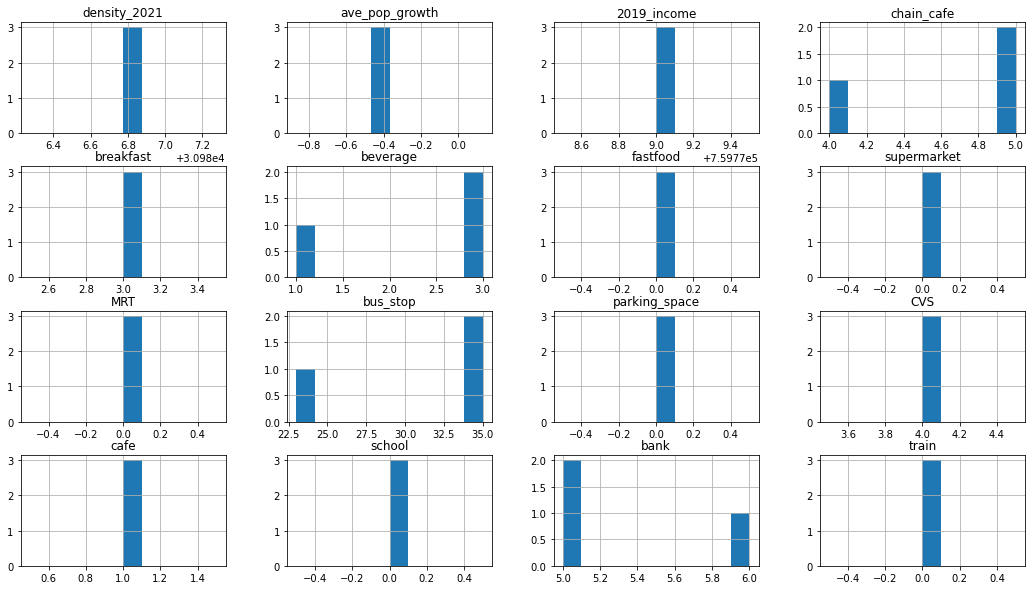

In [87]:
dfz_4.hist(figsize=(18, 10));

# 大部分人口密度(30986.774138)
# 人口大多緩步負成長(-0.368677)
# 年收均值(759779)
# 平均有(5)間小型咖啡廳
# 沒有早餐店(3)
# 飲料店(3)
# 速食餐廳(0)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(4)
# cafe(1)
# school(0)
# 銀行(5)
# 火車站(0)
# 巴士站至少(35)站

In [88]:
dfz_4.median()

density_2021       30986.774138
ave_pop_growth        -0.368677
2019_income       759779.000000
chain_cafe             5.000000
breakfast              3.000000
beverage               3.000000
fastfood               0.000000
supermarket            0.000000
MRT                    0.000000
bus_stop              35.000000
parking_space          0.000000
CVS                    4.000000
cafe                   1.000000
school                 0.000000
bank                   5.000000
train                  0.000000
dtype: float64

In [89]:
dfz_5=feature_o[feature_o['labels'] == 5].loc[:,'density_2021':'train']
dfz_5.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000e+00,3.000000,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
mean,1.564154e+04,1.141744,3539135.0,4.0,0.0,2.0,1.0,0.0,1.0,45.0,0.0,1.0,1.0,0.0,0.0,0.0
std,2.227798e-12,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.564154e+04,1.141744,3539135.0,4.0,0.0,2.0,1.0,0.0,1.0,45.0,0.0,1.0,1.0,0.0,0.0,0.0
25%,1.564154e+04,1.141744,3539135.0,4.0,0.0,2.0,1.0,0.0,1.0,45.0,0.0,1.0,1.0,0.0,0.0,0.0
50%,1.564154e+04,1.141744,3539135.0,4.0,0.0,2.0,1.0,0.0,1.0,45.0,0.0,1.0,1.0,0.0,0.0,0.0
75%,1.564154e+04,1.141744,3539135.0,4.0,0.0,2.0,1.0,0.0,1.0,45.0,0.0,1.0,1.0,0.0,0.0,0.0
max,1.564154e+04,1.141744,3539135.0,4.0,0.0,2.0,1.0,0.0,1.0,45.0,0.0,1.0,1.0,0.0,0.0,0.0


In [90]:
feature_o[feature_o['labels'] == 5]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
65,cama,新北市板橋區南雅南路二段21號Ｂ1,24.997312,121.452312,15641.543072,1.141744,3539135,4,0.0,2.0,...,1.0,45.0,0.0,1.0,1.0,0.0,0.0,0.0,新北市板橋,5
525,stbks,新北市板橋區南雅南路二段21號,24.997312,121.452312,15641.543072,1.141744,3539135,4,0.0,2.0,...,1.0,45.0,0.0,1.0,1.0,0.0,0.0,0.0,新北市板橋,5
526,stbks,新北市板橋區南雅南路二段21號(亞東捷運站3號出口亞東醫院旁),24.997312,121.452312,15641.543072,1.141744,3539135,4,0.0,2.0,...,1.0,45.0,0.0,1.0,1.0,0.0,0.0,0.0,新北市板橋,5


In [91]:
dfz_5.median()

density_2021      1.564154e+04
ave_pop_growth    1.141744e+00
2019_income       3.539135e+06
chain_cafe        4.000000e+00
breakfast         0.000000e+00
beverage          2.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               1.000000e+00
bus_stop          4.500000e+01
parking_space     0.000000e+00
CVS               1.000000e+00
cafe              1.000000e+00
school            0.000000e+00
bank              0.000000e+00
train             0.000000e+00
dtype: float64

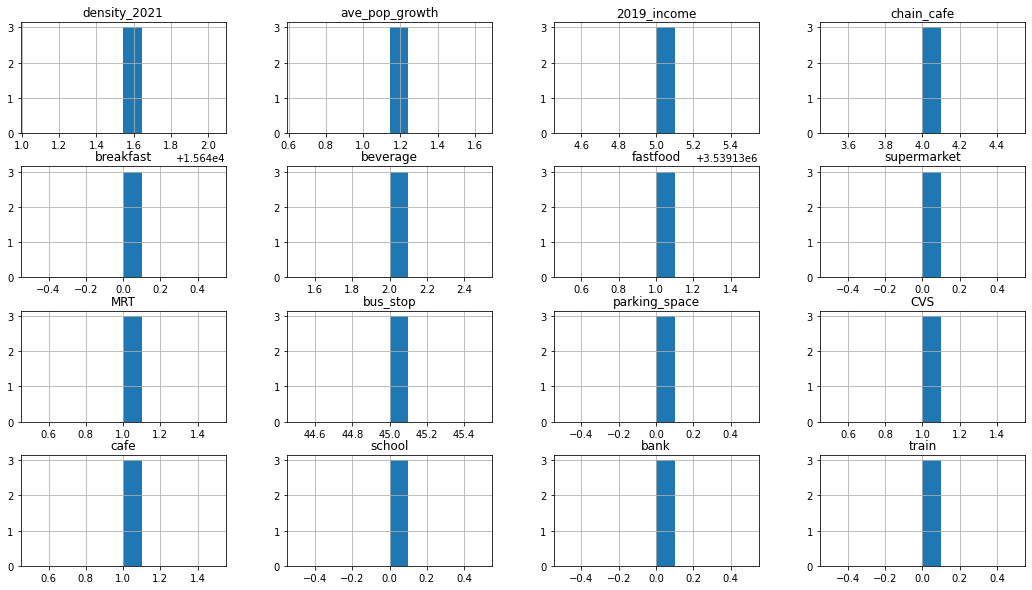

In [92]:
dfz_5.hist(figsize=(18, 10));

# 大部分人口密度(1.564154)
# 人口大多緩步負成長(1.141744)
# 年收均值(3539135)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(2)
# 速食餐廳(1)
# 超市(0)
# 捷運(1)
# 停車場(0)
# CVS(1)
# cafe(1)
# school(0)
# 銀行(0)
# 火車站(0)
# 巴士站至少(45)站

In [93]:
dfz_6=feature_o[feature_o['labels'] == 6].loc[:,'density_2021':'train']
dfz_6.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,9.000000,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.0,9.000000,9.0,9.000000,9.0,9.000000,9.000000,9.0,9.000000,9.0
mean,46864.259587,-0.959449,1.520691e+06,1.444444,0.333333,0.333333,0.0,0.111111,0.0,19.666667,1.0,3.333333,0.444444,0.0,1.000000,0.0
std,8650.433561,0.510046,4.730034e+05,0.527046,0.500000,0.707107,0.0,0.333333,0.0,10.210289,1.0,1.000000,1.013794,0.0,0.866025,0.0
min,41448.335480,-1.888270,9.446510e+05,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,2.000000,0.000000,0.0,0.000000,0.0
25%,41909.907654,-1.171617,1.338553e+06,1.000000,0.000000,0.000000,0.0,0.000000,0.0,16.000000,0.0,3.000000,0.000000,0.0,0.000000,0.0
50%,43958.144373,-0.878782,1.375222e+06,1.000000,0.000000,0.000000,0.0,0.000000,0.0,19.000000,1.0,3.000000,0.000000,0.0,1.000000,0.0
75%,45347.023208,-0.855472,1.581626e+06,2.000000,1.000000,0.000000,0.0,0.000000,0.0,22.000000,2.0,4.000000,0.000000,0.0,2.000000,0.0
max,68761.751995,-0.012384,2.642120e+06,2.000000,1.000000,2.000000,0.0,1.000000,0.0,39.000000,2.0,5.000000,3.000000,0.0,2.000000,0.0


In [94]:
feature_o[feature_o['labels'] == 6]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
67,cama,新北市板橋區板新路一號,25.012371,121.475555,43958.144373,-0.855472,1375222,2,1.0,0.0,...,0.0,20.0,2.0,4.0,0.0,0.0,2.0,0.0,新北市板橋,6
245,louisa,新北市中和區自立路5號,24.996572,121.522600,44168.289903,-0.012384,1467716,2,0.0,0.0,...,0.0,19.0,2.0,3.0,0.0,0.0,0.0,0.0,新北市中和,6
285,louisa,新北市板橋區民生路一段35號,25.012664,121.475739,68761.751995,-1.232630,2642120,2,1.0,0.0,...,0.0,22.0,2.0,5.0,0.0,0.0,2.0,0.0,新北市板橋,6
438,stbks,台北市大同區保安街11號,25.059260,121.513199,45347.023208,-1.171617,1338553,1,0.0,1.0,...,0.0,16.0,0.0,2.0,3.0,0.0,1.0,0.0,台北市大同,6
554,stbks,新北市永和區民生路46巷50號,24.996490,121.521027,41773.262841,-0.589286,1581626,2,1.0,0.0,...,0.0,19.0,2.0,4.0,0.0,0.0,0.0,0.0,新北市永和,6
585,85 cafe,台北市北投區中和街335號,25.141082,121.499517,41448.335480,-1.888270,1240561,1,0.0,2.0,...,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,台北市北投,6
614,85 cafe,新北市中和區中正路226號,24.994039,121.496291,41909.907654,-0.878782,944651,1,0.0,0.0,...,0.0,39.0,0.0,4.0,0.0,0.0,0.0,0.0,新北市中和,6
642,85 cafe,新北市板橋區雙十路二段10號1樓,25.026720,121.476609,50453.476451,-1.151128,1720551,1,0.0,0.0,...,0.0,16.0,0.0,2.0,0.0,0.0,1.0,0.0,新北市板橋,6
643,85 cafe,新北市板橋區中山路一段266號1樓,25.014676,121.471835,43958.144373,-0.855472,1375222,1,0.0,0.0,...,0.0,26.0,1.0,3.0,0.0,0.0,2.0,0.0,新北市板橋,6


In [95]:
dfz_6.median()

density_2021      4.395814e+04
ave_pop_growth   -8.787824e-01
2019_income       1.375222e+06
chain_cafe        1.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          0.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          1.900000e+01
parking_space     1.000000e+00
CVS               3.000000e+00
cafe              0.000000e+00
school            0.000000e+00
bank              1.000000e+00
train             0.000000e+00
dtype: float64

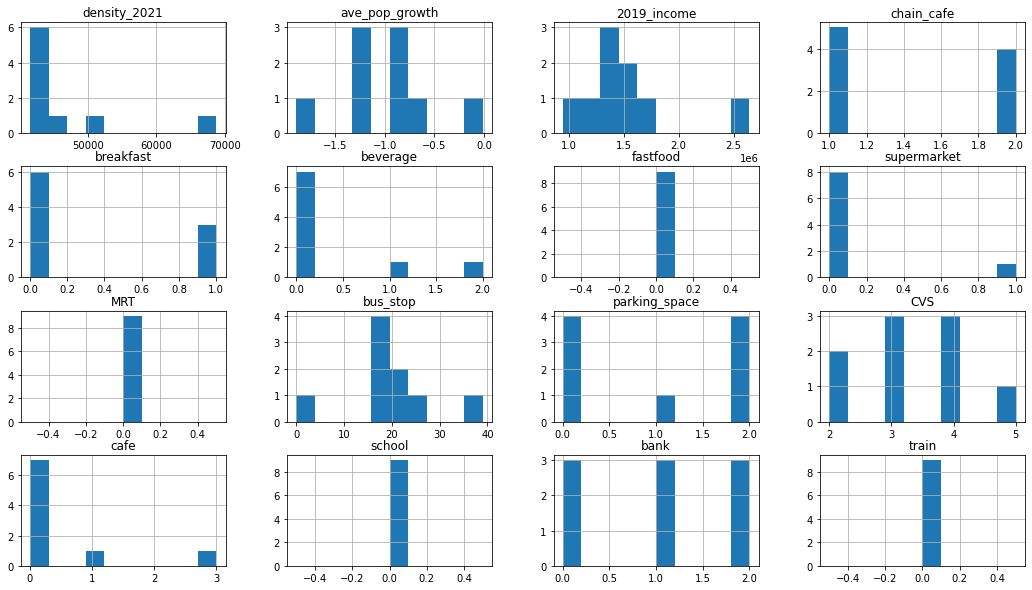

In [96]:
dfz_6.hist(figsize=(18, 10));

# 大部分人口密度(43958.14)
# 人口大多緩步負成長(-0.8787824)
# 年收均值(1375222)
# 平均有(1)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(0)
# 速食餐廳(0)
# 超市(0)
# 捷運(1)
# 停車場(1)
# CVS(3)
# cafe(0)
# school(0)
# 銀行(1)
# 火車站(0)
# 巴士站至少(19)站

In [97]:
dfz_7=feature_o[feature_o['labels'] == 7].loc[:,'density_2021':'train']
dfz_7.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.0,5.0,5.0,5.0,5.0,5.000000,5.000000,5.0,5.00000,5.0
mean,11876.921942,-0.297250,2.699686e+06,2.600000,0.800000,1.000000,0.0,2.0,0.0,0.0,0.0,4.200000,3.600000,0.0,6.20000,0.0
std,9255.018637,0.219843,1.281552e+05,0.547723,0.447214,0.707107,0.0,0.0,0.0,0.0,0.0,0.447214,1.140175,0.0,1.30384,0.0
min,2017.152585,-0.500099,2.562417e+06,2.000000,0.000000,0.000000,0.0,2.0,0.0,0.0,0.0,4.000000,2.000000,0.0,4.00000,0.0
25%,2017.152585,-0.500099,2.562417e+06,2.000000,1.000000,1.000000,0.0,2.0,0.0,0.0,0.0,4.000000,3.000000,0.0,6.00000,0.0
50%,16690.778379,-0.258768,2.769267e+06,3.000000,1.000000,1.000000,0.0,2.0,0.0,0.0,0.0,4.000000,4.000000,0.0,7.00000,0.0
75%,16690.778379,-0.258768,2.769267e+06,3.000000,1.000000,1.000000,0.0,2.0,0.0,0.0,0.0,4.000000,4.000000,0.0,7.00000,0.0
max,21968.747781,0.031484,2.835061e+06,3.000000,1.000000,2.000000,0.0,2.0,0.0,0.0,0.0,5.000000,5.000000,0.0,7.00000,0.0


In [98]:
feature_o[feature_o['labels'] == 7]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
2,cama,台北市中山區長安東路二段94號,25.048324,121.534597,16690.778379,-0.500099,2769267,3,1.0,0.0,...,0.0,0.0,0.0,4.0,5.0,0.0,4.0,0.0,台北市中山,7
54,cama,台北市松山區民生東路四段79之2號,25.058066,121.551548,2017.152585,-0.258768,2562417,2,0.0,1.0,...,0.0,0.0,0.0,4.0,4.0,0.0,7.0,0.0,台北市松山,7
84,louisa,台北市民生東路四段56巷3弄1號,25.057182,121.551755,2017.152585,-0.258768,2562417,2,1.0,1.0,...,0.0,0.0,0.0,4.0,3.0,0.0,7.0,0.0,台北市民生東路四段56巷3弄1號,7
104,louisa,台北市中山區長安東路二段78-1號,25.048335,121.533957,16690.778379,-0.500099,2769267,3,1.0,1.0,...,0.0,0.0,0.0,5.0,4.0,0.0,7.0,0.0,台北市中山,7
358,stbks,台北市中山區松江路54號1樓,25.048680,121.532752,21968.747781,0.031484,2835061,3,1.0,2.0,...,0.0,0.0,0.0,4.0,2.0,0.0,6.0,0.0,台北市中山,7


In [99]:
dfz_7.median()

density_2021      1.669078e+04
ave_pop_growth   -2.587679e-01
2019_income       2.769267e+06
chain_cafe        3.000000e+00
breakfast         1.000000e+00
beverage          1.000000e+00
fastfood          0.000000e+00
supermarket       2.000000e+00
MRT               0.000000e+00
bus_stop          0.000000e+00
parking_space     0.000000e+00
CVS               4.000000e+00
cafe              4.000000e+00
school            0.000000e+00
bank              7.000000e+00
train             0.000000e+00
dtype: float64

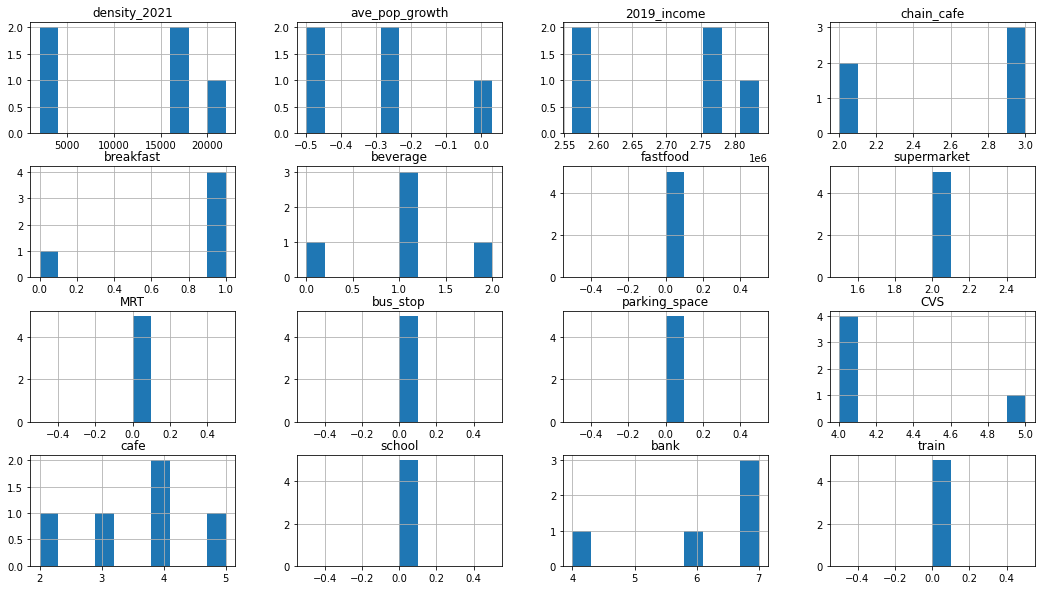

In [100]:
dfz_7.hist(figsize=(18, 10));

# 大部分人口密度(16690.78)
# 人口大多緩步負成長(-0.2587679)
# 年收均值(3)
# 平均有(1)間小型咖啡廳
# 沒有早餐店(1)
# 飲料店(0)
# 速食餐廳(2)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(4)
# cafe(4)
# school(0)
# 銀行(7)
# 火車站(0)
# 巴士站至少(0)站

In [101]:
dfz_8=feature_o[feature_o['labels'] == 8].loc[:,'density_2021':'train']
dfz_8.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.000000,3.0,3.0,3.0,3.0,3.0,3.0
mean,5571.268991,0.026894,1158026.0,3.0,3.0,0.0,0.0,0.0,0.0,102.666667,0.0,3.0,0.0,0.0,2.0,0.0
std,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.547005,0.0,0.0,0.0,0.0,0.0,0.0
min,5571.268991,0.026894,1158026.0,3.0,3.0,0.0,0.0,0.0,0.0,96.000000,0.0,3.0,0.0,0.0,2.0,0.0
25%,5571.268991,0.026894,1158026.0,3.0,3.0,0.0,0.0,0.0,0.0,96.000000,0.0,3.0,0.0,0.0,2.0,0.0
50%,5571.268991,0.026894,1158026.0,3.0,3.0,0.0,0.0,0.0,0.0,96.000000,0.0,3.0,0.0,0.0,2.0,0.0
75%,5571.268991,0.026894,1158026.0,3.0,3.0,0.0,0.0,0.0,0.0,106.000000,0.0,3.0,0.0,0.0,2.0,0.0
max,5571.268991,0.026894,1158026.0,3.0,3.0,0.0,0.0,0.0,0.0,116.000000,0.0,3.0,0.0,0.0,2.0,0.0


In [102]:
feature_o[feature_o['labels'] == 8]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
226,louisa,新北市三重區重新路五段609巷2-1號,25.045563,121.468435,5571.268991,0.026894,1158026,3,3.0,0.0,...,0.0,116.0,0.0,3.0,0.0,0.0,2.0,0.0,新北市三重,8
491,stbks,新北市三重區重新路五段609巷10號之3,25.045928,121.468117,5571.268991,0.026894,1158026,3,3.0,0.0,...,0.0,96.0,0.0,3.0,0.0,0.0,2.0,0.0,新北市三重,8
492,stbks,新北市三重區重新路五段609巷10號之3,25.045928,121.468117,5571.268991,0.026894,1158026,3,3.0,0.0,...,0.0,96.0,0.0,3.0,0.0,0.0,2.0,0.0,新北市三重,8


In [103]:
dfz_8.median()

density_2021      5.571269e+03
ave_pop_growth    2.689367e-02
2019_income       1.158026e+06
chain_cafe        3.000000e+00
breakfast         3.000000e+00
beverage          0.000000e+00
fastfood          0.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          9.600000e+01
parking_space     0.000000e+00
CVS               3.000000e+00
cafe              0.000000e+00
school            0.000000e+00
bank              2.000000e+00
train             0.000000e+00
dtype: float64

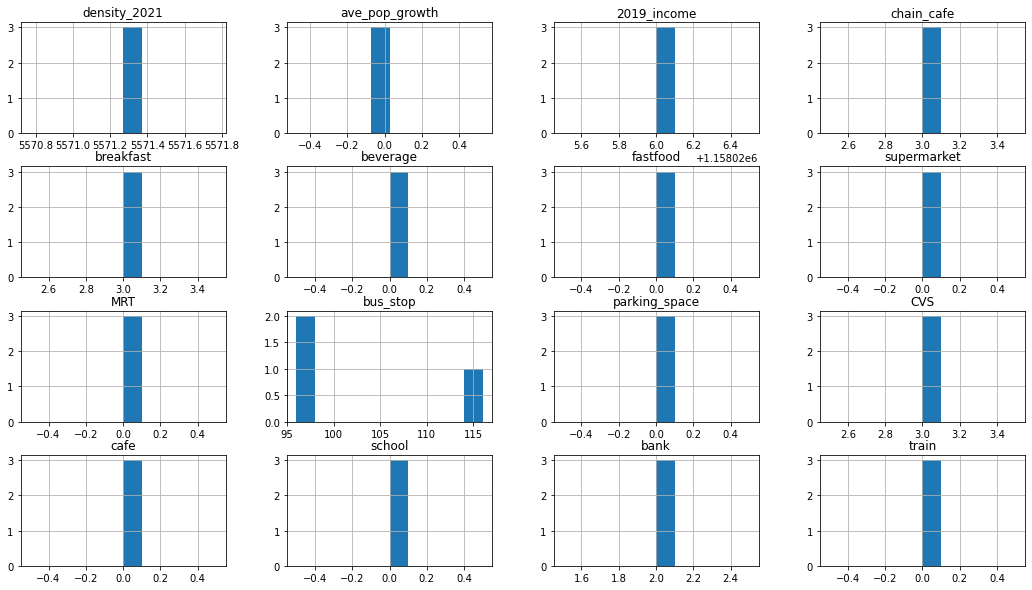

In [104]:
dfz_8.hist(figsize=(18, 10));

# 大部分人口密度(5571.269)
# 人口大多緩步負成長(0.02689367)
# 年收均值(1158026)
# 平均有(3)間小型咖啡廳
# 沒有早餐店(3)
# 飲料店(0)
# 速食餐廳(0)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(3)
# cafe(0)
# school(0)
# 銀行(2)
# 火車站(0)
# 巴士站至少(96)站

In [105]:
dfz_9=feature_o[feature_o['labels'] == 9].loc[:,'density_2021':'train']
dfz_9.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000e+00,3.0,3.0,3.0,3.000000,3.0,3.0,3.0,3.000000,3.0,3.000000,3.0,3.0,3.000000,3.0
mean,18733.977285,2.921902e+00,803548.0,4.0,0.0,1.666667,0.0,0.0,1.0,85.333333,3.0,4.666667,0.0,0.0,0.666667,0.0
std,0.000000,5.438960e-16,0.0,0.0,0.0,0.577350,0.0,0.0,0.0,1.154701,0.0,0.577350,0.0,0.0,0.577350,0.0
min,18733.977285,2.921902e+00,803548.0,4.0,0.0,1.000000,0.0,0.0,1.0,84.000000,3.0,4.000000,0.0,0.0,0.000000,0.0
25%,18733.977285,2.921902e+00,803548.0,4.0,0.0,1.500000,0.0,0.0,1.0,85.000000,3.0,4.500000,0.0,0.0,0.500000,0.0
50%,18733.977285,2.921902e+00,803548.0,4.0,0.0,2.000000,0.0,0.0,1.0,86.000000,3.0,5.000000,0.0,0.0,1.000000,0.0
75%,18733.977285,2.921902e+00,803548.0,4.0,0.0,2.000000,0.0,0.0,1.0,86.000000,3.0,5.000000,0.0,0.0,1.000000,0.0
max,18733.977285,2.921902e+00,803548.0,4.0,0.0,2.000000,0.0,0.0,1.0,86.000000,3.0,5.000000,0.0,0.0,1.000000,0.0


In [106]:
feature_o[feature_o['labels'] == 9]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
269,louisa,新北市新店區北宜路一段26號,24.957101,121.537961,18733.977285,2.921902,803548,4,0.0,1.0,...,1.0,84.0,3.0,4.0,0.0,0.0,0.0,0.0,新北市新店,9
509,stbks,新北市新店區北宜路一段2號,24.957871,121.537784,18733.977285,2.921902,803548,4,0.0,2.0,...,1.0,86.0,3.0,5.0,0.0,0.0,1.0,0.0,新北市新店,9
510,stbks,新北市新店區北宜路一段2號2F,24.957871,121.537784,18733.977285,2.921902,803548,4,0.0,2.0,...,1.0,86.0,3.0,5.0,0.0,0.0,1.0,0.0,新北市新店,9


In [107]:
dfz_9.median()

density_2021       18733.977285
ave_pop_growth         2.921902
2019_income       803548.000000
chain_cafe             4.000000
breakfast              0.000000
beverage               2.000000
fastfood               0.000000
supermarket            0.000000
MRT                    1.000000
bus_stop              86.000000
parking_space          3.000000
CVS                    5.000000
cafe                   0.000000
school                 0.000000
bank                   1.000000
train                  0.000000
dtype: float64

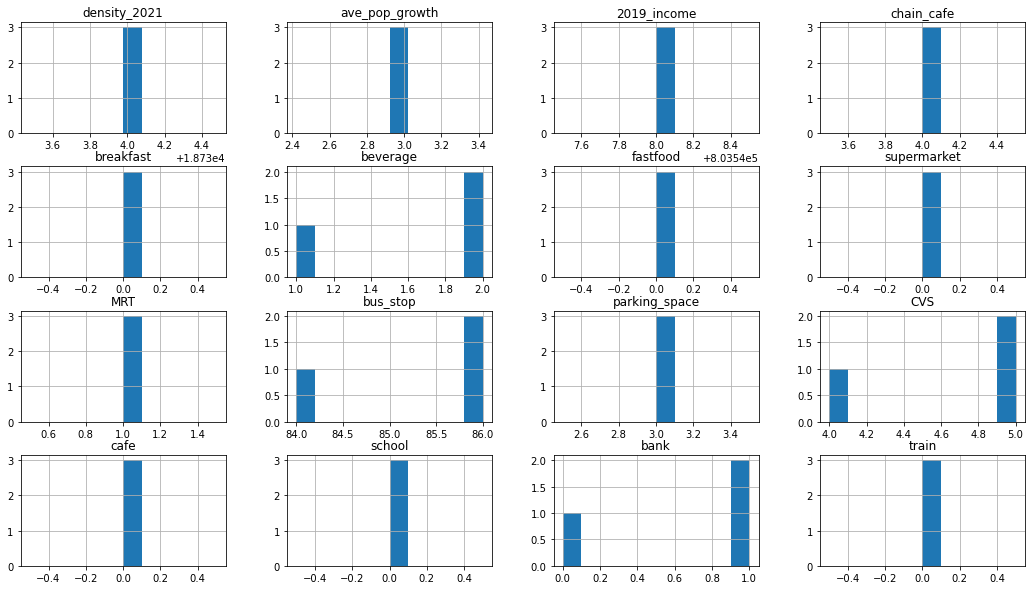

In [108]:
dfz_9.hist(figsize=(18, 10));

# 大部分人口密度(18733.977285)
# 人口大多緩步負成長(2.921902)
# 年收均值(803548)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(2)
# 速食餐廳(0)
# 超市(0)
# 捷運(1)
# 停車場(3)
# CVS(5)
# cafe(0)
# school(0)
# 銀行(1)
# 火車站(0)
# 巴士站至少(86)站

In [109]:
dfz_10=feature_o[feature_o['labels'] == 10].loc[:,'density_2021':'train']
dfz_10.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.000000e+00,4.0,4.0,4.00,4.00,4.0,4.0,4.000000,4.0,4.00,4.00,4.0,4.000000,4.0
mean,4953.116092,-1.809906,6.661298e+05,1.0,0.0,1.75,0.25,1.0,0.0,47.500000,0.0,2.25,0.25,0.0,1.000000,0.0
std,3152.478233,1.033643,4.336342e+05,0.0,0.0,0.50,0.50,0.0,0.0,5.322906,0.0,0.50,0.50,0.0,1.414214,0.0
min,1944.939354,-2.656622,7.781200e+04,1.0,0.0,1.00,0.00,1.0,0.0,42.000000,0.0,2.00,0.00,0.0,0.000000,0.0
25%,3210.337902,-2.652508,5.440990e+05,1.0,0.0,1.75,0.00,1.0,0.0,43.500000,0.0,2.00,0.00,0.0,0.000000,0.0
50%,4276.652674,-2.019507,7.328775e+05,1.0,0.0,2.00,0.00,1.0,0.0,47.500000,0.0,2.00,0.00,0.0,0.500000,0.0
75%,6019.430864,-1.176905,8.549082e+05,1.0,0.0,2.00,0.25,1.0,0.0,51.500000,0.0,2.25,0.25,0.0,1.500000,0.0
max,9314.219668,-0.543988,1.120952e+06,1.0,0.0,2.00,1.00,1.0,0.0,53.000000,0.0,3.00,1.00,0.0,3.000000,0.0


In [110]:
feature_o[feature_o['labels'] == 10]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
280,louisa,新北市新莊區建國一路55號,25.030626,121.434752,3632.137418,-2.651137,699528,1,0.0,2.0,...,0.0,51.0,0.0,2.0,1.0,0.0,0.0,0.0,新北市新莊,10
521,stbks,新北市新莊區新泰路308號1-2樓,25.041232,121.445452,9314.219668,-1.387878,766227,1,0.0,2.0,...,0.0,44.0,0.0,3.0,0.0,0.0,3.0,0.0,新北市新莊,10
604,85 cafe,新北市三芝區中正路一段50號,25.258177,121.503593,1944.939354,-0.543988,1120952,1,0.0,2.0,...,0.0,42.0,0.0,2.0,0.0,0.0,1.0,0.0,新北市三芝,10
670,85 cafe,新北市金山區中山路106號,25.219346,121.639930,4921.167930,-2.656622,77812,1,0.0,1.0,...,0.0,53.0,0.0,2.0,0.0,0.0,0.0,0.0,新北市金山,10


In [111]:
dfz_10.median()

density_2021        4276.652674
ave_pop_growth        -2.019507
2019_income       732877.500000
chain_cafe             1.000000
breakfast              0.000000
beverage               2.000000
fastfood               0.000000
supermarket            1.000000
MRT                    0.000000
bus_stop              47.500000
parking_space          0.000000
CVS                    2.000000
cafe                   0.000000
school                 0.000000
bank                   0.500000
train                  0.000000
dtype: float64

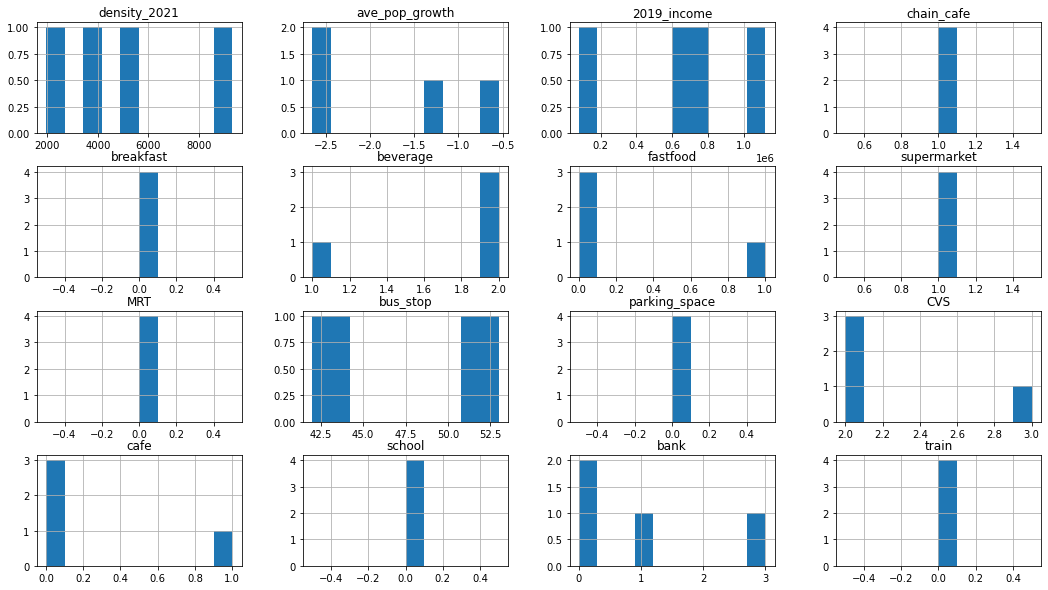

In [112]:
dfz_10.hist(figsize=(18, 10));

# 大部分人口密度(4276.652674)
# 人口大多緩步負成長(-2.019507)
# 年收均值(732877.5)
# 平均有(1)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(2)
# 速食餐廳(0)
# 超市(1)
# 捷運(0)
# 停車場(0)
# CVS(2)
# cafe(0)
# school(0)
# 銀行(0.5)
# 火車站(0)
# 巴士站至少(47.5)站

In [113]:
dfz_11=feature_o[feature_o['labels'] == 11].loc[:,'density_2021':'train']
dfz_11.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0
std,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0
25%,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0
50%,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0
75%,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0
max,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0


In [114]:
feature_o[feature_o['labels'] == 11]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
293,louisa,新北市板橋區縣民大道二段7號B1,25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0,新北市板橋,11
533,stbks,新北市板橋區縣民大道二段7號1F,25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0,新北市板橋,11
534,stbks,新北市板橋區縣民大道二段7號B1,25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0,新北市板橋,11
535,stbks,新北市板橋區縣民大道二段7號B1 (捷運3A出口),25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0,新北市板橋,11
536,stbks,新北市板橋區縣民大道二段7號B1(近台鐵及高鐵入口處),25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,106.0,5.0,7.0,2.0,0.0,0.0,1.0,新北市板橋,11


In [115]:
dfz_11.median()

density_2021      2.035921e+04
ave_pop_growth    4.416789e-01
2019_income       3.018264e+06
chain_cafe        5.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               1.000000e+00
bus_stop          1.060000e+02
parking_space     5.000000e+00
CVS               7.000000e+00
cafe              2.000000e+00
school            0.000000e+00
bank              0.000000e+00
train             1.000000e+00
dtype: float64

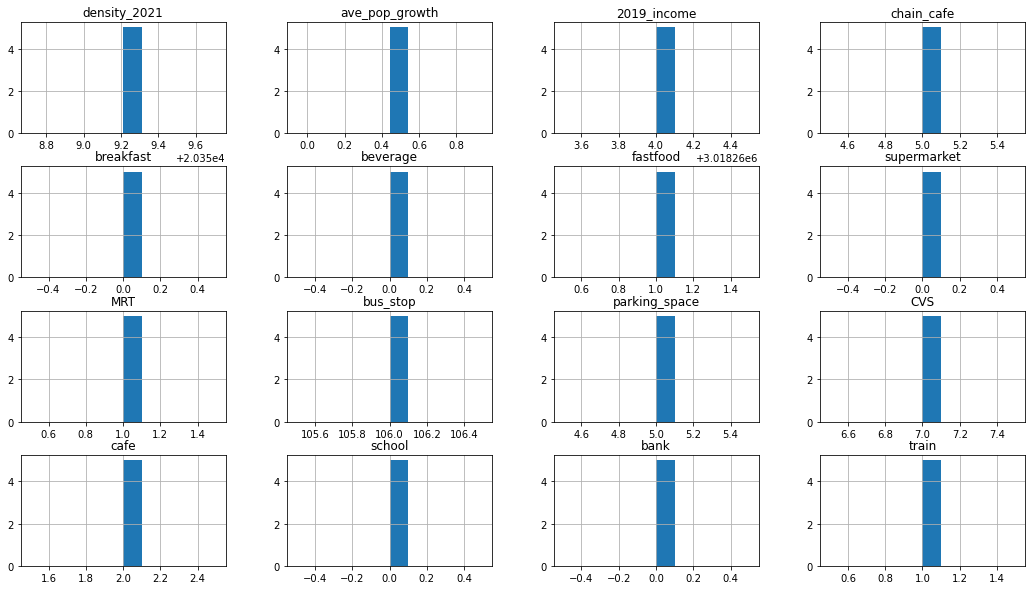

In [116]:
dfz_11.hist(figsize=(18, 10));

# 大部分人口密度(20359.21)
# 人口成長(0.4416789)
# 年收均值(3018264)
# 平均有(5)間小型咖啡廳
# 早餐店(0)
# 飲料店(0)
# 速食餐廳(0)
# 超市(0)
# 捷運(1)
# 停車場(5)
# CVS(7)
# cafe(2)
# school(0)
# 銀行(0)
# 火車站(1)
# 巴士站至少(106)站

In [117]:
dfz_12=feature_o[feature_o['labels'] == 12].loc[:,'density_2021':'train']
dfz_12.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.00000,3.000000,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.000000,3.0,3.000000,3.0,3.0,3.0,3.0
mean,6952.09652,10.359882,10578817.0,3.0,0.0,0.0,0.0,2.0,0.0,104.333333,2.0,2.666667,1.0,0.0,1.0,0.0
std,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.154701,0.0,0.577350,0.0,0.0,0.0,0.0
min,6952.09652,10.359882,10578817.0,3.0,0.0,0.0,0.0,2.0,0.0,103.000000,2.0,2.000000,1.0,0.0,1.0,0.0
25%,6952.09652,10.359882,10578817.0,3.0,0.0,0.0,0.0,2.0,0.0,104.000000,2.0,2.500000,1.0,0.0,1.0,0.0
50%,6952.09652,10.359882,10578817.0,3.0,0.0,0.0,0.0,2.0,0.0,105.000000,2.0,3.000000,1.0,0.0,1.0,0.0
75%,6952.09652,10.359882,10578817.0,3.0,0.0,0.0,0.0,2.0,0.0,105.000000,2.0,3.000000,1.0,0.0,1.0,0.0
max,6952.09652,10.359882,10578817.0,3.0,0.0,0.0,0.0,2.0,0.0,105.000000,2.0,3.000000,1.0,0.0,1.0,0.0


In [118]:
feature_o[feature_o['labels'] == 12]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
307,louisa,新北市林口區忠孝一路12號,25.073093,121.364383,6952.09652,10.359882,10578817,3,0.0,0.0,...,0.0,103.0,2.0,2.0,1.0,0.0,1.0,0.0,新北市林口,12
542,stbks,新北市林口區文化三路一段359 號,25.072814,121.364907,6952.09652,10.359882,10578817,3,0.0,0.0,...,0.0,105.0,2.0,3.0,1.0,0.0,1.0,0.0,新北市林口,12
543,stbks,新北市林口區文化三路一段359號,25.072814,121.364907,6952.09652,10.359882,10578817,3,0.0,0.0,...,0.0,105.0,2.0,3.0,1.0,0.0,1.0,0.0,新北市林口,12


In [119]:
dfz_12.median()

density_2021      6.952097e+03
ave_pop_growth    1.035988e+01
2019_income       1.057882e+07
chain_cafe        3.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          0.000000e+00
supermarket       2.000000e+00
MRT               0.000000e+00
bus_stop          1.050000e+02
parking_space     2.000000e+00
CVS               3.000000e+00
cafe              1.000000e+00
school            0.000000e+00
bank              1.000000e+00
train             0.000000e+00
dtype: float64

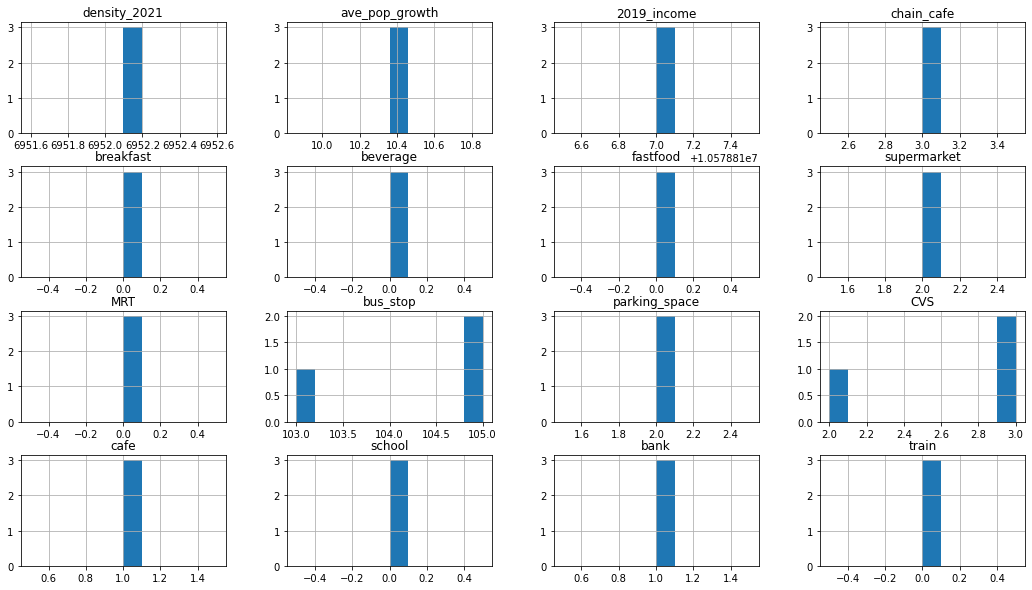

In [120]:
dfz_12.hist(figsize=(18, 10));

# 大部分人口密度(6952.097)
# 人口大多緩步負成長(10.35988)
# 年收均值(10578820)
# 平均有(3)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(0)
# 速食餐廳(0)
# 超市(2)
# 捷運(0)
# 停車場(2)
# CVS(3)
# cafe(1)
# school(0)
# 銀行(1)
# 火車站(0)
# 巴士站至少(105)站

In [121]:
dfz_13=feature_o[feature_o['labels'] == 13].loc[:,'density_2021':'train']
dfz_13.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000,3.000000e+00,3.0,3.0,3.0,3.0,3.0,3.0,3.000000,3.0,3.0,3.0,3.0,3.0,3.0
mean,8750.887689,7.496946,9.995468e+06,3.0,1.0,0.0,1.0,0.0,0.0,82.333333,1.0,3.0,2.0,0.0,0.0,0.0
std,1557.798848,2.479376,5.051953e+05,0.0,0.0,0.0,0.0,0.0,0.0,7.505553,0.0,0.0,0.0,0.0,0.0,0.0
min,6952.096520,6.065478,9.703793e+06,3.0,1.0,0.0,1.0,0.0,0.0,78.000000,1.0,3.0,2.0,0.0,0.0,0.0
25%,8301.189897,6.065478,9.703793e+06,3.0,1.0,0.0,1.0,0.0,0.0,78.000000,1.0,3.0,2.0,0.0,0.0,0.0
50%,9650.283273,6.065478,9.703793e+06,3.0,1.0,0.0,1.0,0.0,0.0,78.000000,1.0,3.0,2.0,0.0,0.0,0.0
75%,9650.283273,8.212680,1.014130e+07,3.0,1.0,0.0,1.0,0.0,0.0,84.500000,1.0,3.0,2.0,0.0,0.0,0.0
max,9650.283273,10.359882,1.057882e+07,3.0,1.0,0.0,1.0,0.0,0.0,91.000000,1.0,3.0,2.0,0.0,0.0,0.0


In [122]:
feature_o[feature_o['labels'] == 13]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
308,louisa,新北市林口區仁愛路二段249號,25.076851,121.374191,6952.096520,10.359882,10578817,3,1.0,0.0,...,0.0,91.0,1.0,3.0,2.0,0.0,0.0,0.0,新北市林口,13
544,stbks,新北市林口區文化二路一段551號,25.077230,121.374582,9650.283273,6.065478,9703793,3,1.0,0.0,...,0.0,78.0,1.0,3.0,2.0,0.0,0.0,0.0,新北市林口,13
545,stbks,新北市林口區文化二路一段551號(家樂福隔壁),25.077230,121.374582,9650.283273,6.065478,9703793,3,1.0,0.0,...,0.0,78.0,1.0,3.0,2.0,0.0,0.0,0.0,新北市林口,13


In [123]:
dfz_13.median()

density_2021      9.650283e+03
ave_pop_growth    6.065478e+00
2019_income       9.703793e+06
chain_cafe        3.000000e+00
breakfast         1.000000e+00
beverage          0.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          7.800000e+01
parking_space     1.000000e+00
CVS               3.000000e+00
cafe              2.000000e+00
school            0.000000e+00
bank              0.000000e+00
train             0.000000e+00
dtype: float64

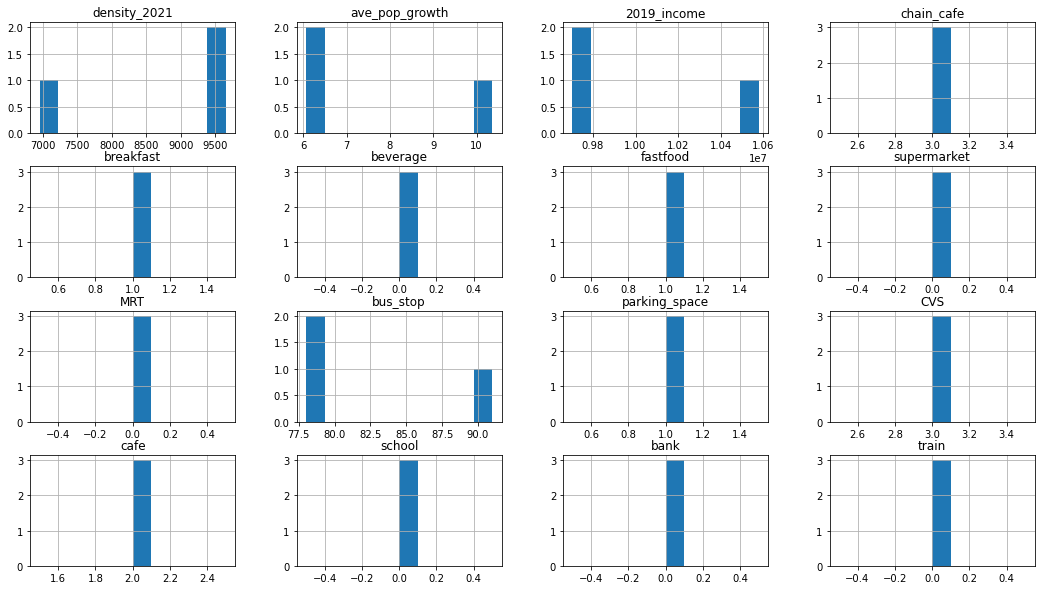

In [124]:
dfz_13.hist(figsize=(18, 10));

# 大部分人口密度(9650.283)
# 人口大多緩步負成長(6.065478)
# 年收均值(9703793)
# 平均有(3)間小型咖啡廳
# 早餐店(1)
# 飲料店(0)
# 速食餐廳(1)
# 超市(0)
# 捷運(0)
# 停車場(1)
# CVS(3)
# cafe(2)
# school(0)
# 銀行(0)
# 火車站(0)
# 巴士站至少(78)站

In [125]:
dfz_14=feature_o[feature_o['labels'] == 14].loc[:,'density_2021':'train']
dfz_14.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.00000,4.0,4.0,4.0,4.0
mean,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,0.0,0.0,55.0,1.0,2.50000,0.0,0.0,2.0,0.0
std,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.57735,0.0,0.0,0.0,0.0
min,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,0.0,0.0,52.0,1.0,2.00000,0.0,0.0,2.0,0.0
25%,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,0.0,0.0,52.0,1.0,2.00000,0.0,0.0,2.0,0.0
50%,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,0.0,0.0,52.0,1.0,2.50000,0.0,0.0,2.0,0.0
75%,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,0.0,0.0,55.0,1.0,3.00000,0.0,0.0,2.0,0.0
max,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,0.0,0.0,64.0,1.0,3.00000,0.0,0.0,2.0,0.0


In [126]:
feature_o[feature_o['labels'] == 14]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
317,louisa,新北市樹林區大雅路282號,24.947306,121.379956,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,64.0,1.0,3.0,0.0,0.0,2.0,0.0,新北市樹林,14
429,stbks,台北市士林區振興街37號,24.947638,121.379931,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,52.0,1.0,2.0,0.0,0.0,2.0,0.0,台北市士林,14
548,stbks,新北市樹林區大雅路288號,24.947600,121.379874,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,52.0,1.0,3.0,0.0,0.0,2.0,0.0,新北市樹林,14
549,stbks,新北市樹林區家樂福北大店大雅路288號,24.947667,121.379910,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,52.0,1.0,2.0,0.0,0.0,2.0,0.0,新北市樹林,14


In [127]:
dfz_14.median()

density_2021      1.195340e+04
ave_pop_growth    8.386823e-01
2019_income       5.934044e+06
chain_cafe        4.000000e+00
breakfast         0.000000e+00
beverage          1.000000e+00
fastfood          0.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          5.200000e+01
parking_space     1.000000e+00
CVS               2.500000e+00
cafe              0.000000e+00
school            0.000000e+00
bank              2.000000e+00
train             0.000000e+00
dtype: float64

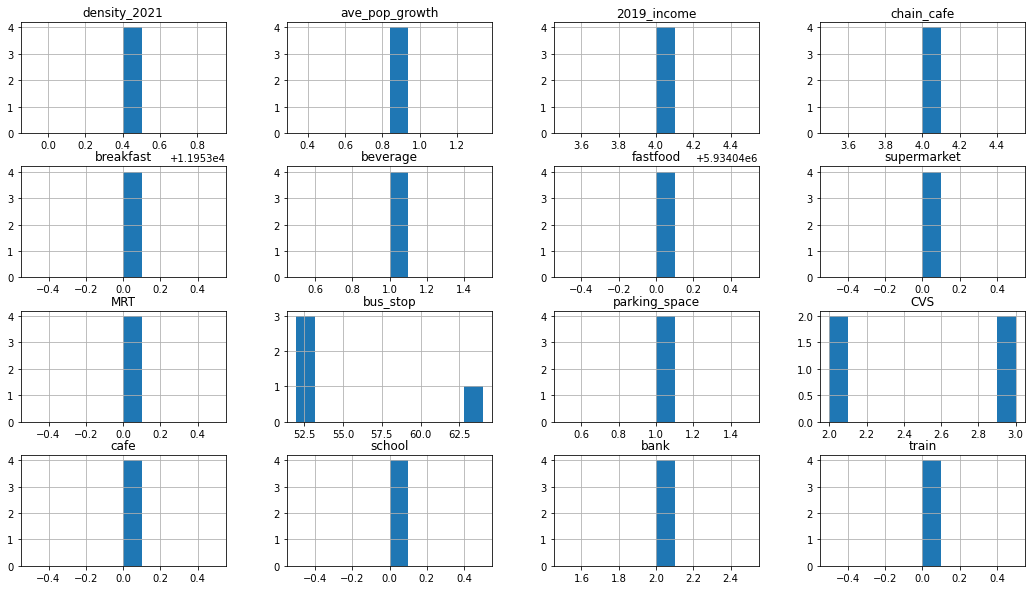

In [128]:
dfz_14.hist(figsize=(18, 10));

# 大部分人口密度(11953.40)
# 人口大多緩步負成長(0.8386823)
# 年收均值(5934044)
# 平均有(4)間小型咖啡廳
# 早餐店(0)
# 飲料店(1)
# 速食餐廳(0)
# 超市(0)
# 捷運(0)
# 停車場(1)
# CVS(2.5)
# cafe(0)
# school(0)
# 銀行(2)
# 火車站(0)
# 巴士站至少(52)站

In [129]:
dfz_15=feature_o[feature_o['labels'] == 15].loc[:,'density_2021':'train']
dfz_15.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000,3.000000e+00,3.0,3.0,3.0,3.0,3.0,3.0,3.000000,3.0,3.0,3.0,3.0,3.0,3.0
mean,66000.129442,-0.630280,1.671888e+06,4.0,0.0,0.0,0.0,0.0,0.0,21.666667,0.0,2.0,1.0,0.0,0.0,0.0
std,20955.807729,0.041902,3.474378e+04,0.0,0.0,0.0,0.0,0.0,0.0,2.309401,0.0,0.0,0.0,0.0,0.0,0.0
min,41802.446975,-0.654472,1.651829e+06,4.0,0.0,0.0,0.0,0.0,0.0,19.000000,0.0,2.0,1.0,0.0,0.0,0.0
25%,59950.708825,-0.654472,1.651829e+06,4.0,0.0,0.0,0.0,0.0,0.0,21.000000,0.0,2.0,1.0,0.0,0.0,0.0
50%,78098.970675,-0.654472,1.651829e+06,4.0,0.0,0.0,0.0,0.0,0.0,23.000000,0.0,2.0,1.0,0.0,0.0,0.0
75%,78098.970675,-0.618184,1.681918e+06,4.0,0.0,0.0,0.0,0.0,0.0,23.000000,0.0,2.0,1.0,0.0,0.0,0.0
max,78098.970675,-0.581895,1.712007e+06,4.0,0.0,0.0,0.0,0.0,0.0,23.000000,0.0,2.0,1.0,0.0,0.0,0.0


In [130]:
feature_o[feature_o['labels'] == 15]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
321,louisa,新北市永和區安樂路270號,25.004102,121.514568,78098.970675,-0.654472,1651829,4,0.0,0.0,...,0.0,23.0,0.0,2.0,1.0,0.0,0.0,0.0,新北市永和,15
553,stbks,新北市永和區安樂路248-7號1F,25.003632,121.514695,41802.446975,-0.581895,1712007,4,0.0,0.0,...,0.0,23.0,0.0,2.0,1.0,0.0,0.0,0.0,新北市永和,15
654,85 cafe,新北市永和區永貞路240號1樓,25.003954,121.514705,78098.970675,-0.654472,1651829,4,0.0,0.0,...,0.0,19.0,0.0,2.0,1.0,0.0,0.0,0.0,新北市永和,15


In [131]:
dfz_15.median()

density_2021      7.809897e+04
ave_pop_growth   -6.544723e-01
2019_income       1.651829e+06
chain_cafe        4.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          0.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          2.300000e+01
parking_space     0.000000e+00
CVS               2.000000e+00
cafe              1.000000e+00
school            0.000000e+00
bank              0.000000e+00
train             0.000000e+00
dtype: float64

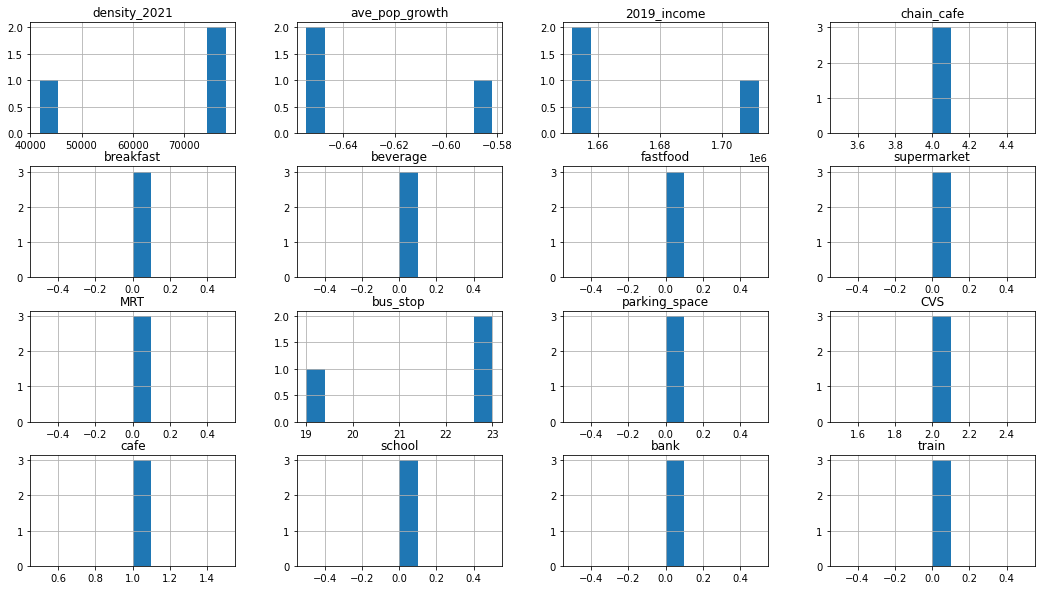

In [132]:
dfz_15.hist(figsize=(18, 10));

# 大部分人口密度(78098.97)
# 人口大多緩步負成長(-0.6544723)
# 年收均值(1651829)
# 平均有(4)間小型咖啡廳
# 早餐店(0)
# 飲料店(0)
# 速食餐廳(0)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(2)
# cafe(1)
# school(0)
# 銀行(0)
# 火車站(0)
# 巴士站至少(23)站

In [133]:
dfz_16=feature_o[feature_o['labels'] == 16].loc[:,'density_2021':'train']
dfz_16.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,7.000000,7.000000,7.000000e+00,7.0,7.000000,7.0,7.0,7.0,7.0,7.000000,7.0,7.0,7.000000,7.0,7.000000,7.0
mean,58877.162110,-0.611163,1.372455e+06,1.0,1.428571,0.0,0.0,1.0,0.0,24.857143,0.0,2.0,0.714286,0.0,0.142857,0.0
std,12028.150813,0.842697,4.603467e+05,0.0,0.786796,0.0,0.0,0.0,0.0,12.266874,0.0,1.0,0.951190,0.0,0.377964,0.0
min,40563.496179,-1.881352,6.969790e+05,1.0,0.000000,0.0,0.0,1.0,0.0,6.000000,0.0,1.0,0.000000,0.0,0.000000,0.0
25%,50778.025301,-1.054475,1.105388e+06,1.0,1.000000,0.0,0.0,1.0,0.0,18.000000,0.0,1.5,0.000000,0.0,0.000000,0.0
50%,64776.774904,-0.855011,1.314292e+06,1.0,2.000000,0.0,0.0,1.0,0.0,29.000000,0.0,2.0,0.000000,0.0,0.000000,0.0
75%,66641.035967,0.006248,1.667881e+06,1.0,2.000000,0.0,0.0,1.0,0.0,33.500000,0.0,2.0,1.500000,0.0,0.000000,0.0
max,71961.741154,0.554675,2.049374e+06,1.0,2.000000,0.0,0.0,1.0,0.0,36.000000,0.0,4.0,2.000000,0.0,1.000000,0.0


In [134]:
feature_o[feature_o['labels'] == 16]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
250,louisa,新北市中和區南華路65號,24.997295,121.504444,65020.119255,-1.122133,2049374,1,0.0,0.0,...,0.0,33.0,0.0,2.0,1.0,0.0,0.0,0.0,新北市中和,16
325,louisa,新北市永和區永元路95巷3號,25.001954,121.522287,64776.774904,-0.986818,1536953,1,1.0,0.0,...,0.0,36.0,0.0,2.0,2.0,0.0,0.0,0.0,新北市永和,16
330,louisa,新北市汐止區福德一路118號,25.067803,121.637308,40563.496179,0.554675,1798809,1,1.0,0.0,...,0.0,34.0,0.0,2.0,0.0,0.0,0.0,0.0,新北市汐止,16
537,stbks,新北市板橋區萬板路32號,25.022316,121.472009,68261.952679,0.185421,1314292,1,2.0,0.0,...,0.0,6.0,0.0,1.0,2.0,0.0,0.0,0.0,新北市板橋,16
617,85 cafe,新北市中和區興南路二段47號,24.985527,121.507435,56679.475189,-1.881352,696979,1,2.0,0.0,...,0.0,27.0,0.0,4.0,0.0,0.0,0.0,0.0,新北市中和,16
631,85 cafe,新北市新莊區八德街151號,25.019687,121.423592,44876.575412,-0.172925,1072542,1,2.0,0.0,...,0.0,9.0,0.0,1.0,0.0,0.0,1.0,0.0,新北市新莊,16
656,85 cafe,新北市永和區得和路320號,24.999469,121.523034,71961.741154,-0.855011,1138235,1,2.0,0.0,...,0.0,29.0,0.0,2.0,0.0,0.0,0.0,0.0,新北市永和,16


In [135]:
dfz_16.median()

density_2021      6.477677e+04
ave_pop_growth   -8.550110e-01
2019_income       1.314292e+06
chain_cafe        1.000000e+00
breakfast         2.000000e+00
beverage          0.000000e+00
fastfood          0.000000e+00
supermarket       1.000000e+00
MRT               0.000000e+00
bus_stop          2.900000e+01
parking_space     0.000000e+00
CVS               2.000000e+00
cafe              0.000000e+00
school            0.000000e+00
bank              0.000000e+00
train             0.000000e+00
dtype: float64

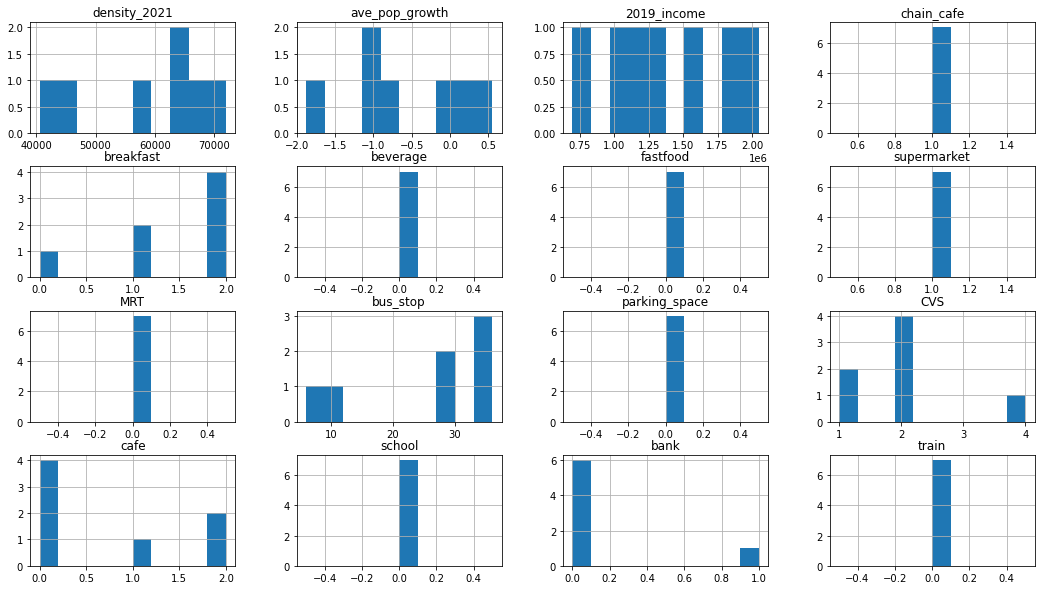

In [136]:
dfz_16.hist(figsize=(18, 10));

# 大部分人口密度(64776.77)
# 人口大多緩步負成長(-0.8550110)
# 年收均值(1314292)
# 平均有(1)間小型咖啡廳
# 早餐店(2)
# 飲料店(0)
# 速食餐廳(0)
# 超市(1)
# 捷運(0)
# 停車場(0)
# CVS(2)
# cafe(0)
# school(0)
# 銀行(0)
# 火車站(0)
# 巴士站至少(29)站

In [137]:
dfz_17=feature_o[feature_o['labels'] == 17].loc[:,'density_2021':'train']
dfz_17.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000,3.000000e+00,3.0,3.000000,3.0,3.0,3.0,3.0,3.000000,3.0,3.0,3.000000,3.0,3.0,3.0
mean,33724.830010,-1.189360,3.617916e+06,2.0,0.333333,0.0,0.0,0.0,0.0,37.333333,0.0,4.0,3.333333,0.0,9.0,0.0
std,5520.475327,0.260525,3.927852e+05,0.0,0.577350,0.0,0.0,0.0,0.0,5.131601,0.0,1.0,0.577350,0.0,1.0,0.0
min,30537.582094,-1.490188,3.164367e+06,2.0,0.000000,0.0,0.0,0.0,0.0,33.000000,0.0,3.0,3.000000,0.0,8.0,0.0
25%,30537.582094,-1.264567,3.504529e+06,2.0,0.000000,0.0,0.0,0.0,0.0,34.500000,0.0,3.5,3.000000,0.0,8.5,0.0
50%,30537.582094,-1.038945,3.844691e+06,2.0,0.000000,0.0,0.0,0.0,0.0,36.000000,0.0,4.0,3.000000,0.0,9.0,0.0
75%,35318.453968,-1.038945,3.844691e+06,2.0,0.500000,0.0,0.0,0.0,0.0,39.500000,0.0,4.5,3.500000,0.0,9.5,0.0
max,40099.325842,-1.038945,3.844691e+06,2.0,1.000000,0.0,0.0,0.0,0.0,43.000000,0.0,5.0,4.000000,0.0,10.0,0.0


In [138]:
feature_o[feature_o['labels'] == 17]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
0,cama,台北市敦化南路二段5號,25.032824,121.549153,30537.582094,-1.038945,3844691,2,1.0,0.0,...,0.0,43.0,0.0,3.0,4.0,0.0,10.0,0.0,台北市敦化南路二段5號,17
185,louisa,台北市大安區敦化南路二段100號,25.027857,121.548387,40099.325842,-1.490188,3164367,2,0.0,0.0,...,0.0,36.0,0.0,4.0,3.0,0.0,8.0,0.0,台北市大安,17
459,stbks,台北市大安區敦化南路二段101號,25.028753,121.549183,30537.582094,-1.038945,3844691,2,0.0,0.0,...,0.0,33.0,0.0,5.0,3.0,0.0,9.0,0.0,台北市大安,17


In [139]:
dfz_17.median()

density_2021      3.053758e+04
ave_pop_growth   -1.038945e+00
2019_income       3.844691e+06
chain_cafe        2.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          0.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          3.600000e+01
parking_space     0.000000e+00
CVS               4.000000e+00
cafe              3.000000e+00
school            0.000000e+00
bank              9.000000e+00
train             0.000000e+00
dtype: float64

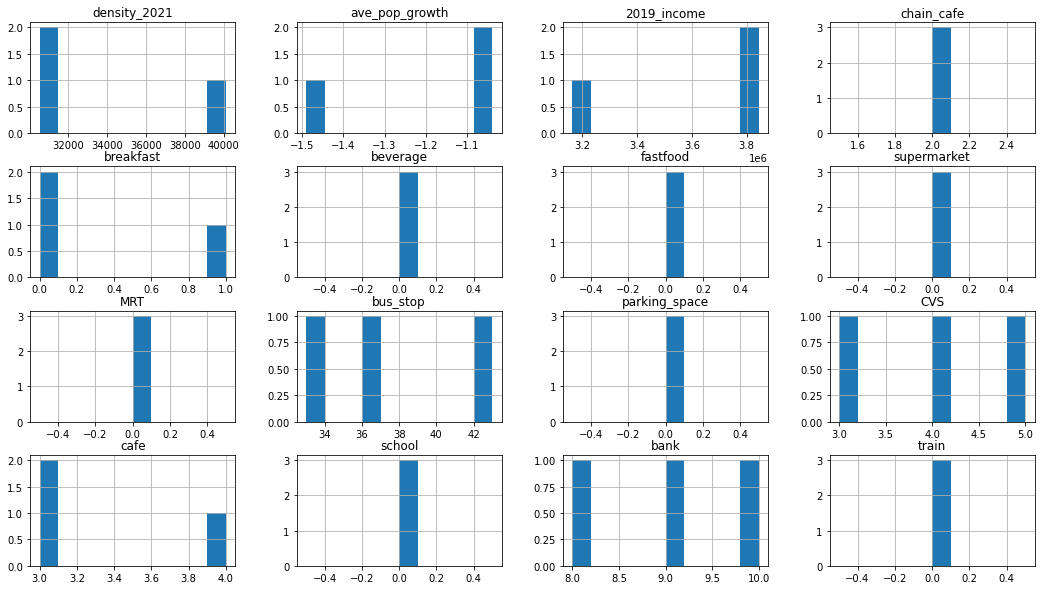

In [140]:
dfz_17.hist(figsize=(18, 10));

# 大部分人口密度(9650.283)
# 人口大多緩步負成長(6.065478)
# 年收均值(9703793)
# 平均有(3)間小型咖啡廳
# 早餐店(1)
# 飲料店(0)
# 速食餐廳(1)
# 超市(0)
# 捷運(0)
# 停車場(1)
# CVS(3)
# cafe(2)
# school(0)
# 銀行(0)
# 火車站(0)
# 巴士站至少(78)站

In [141]:
dfz_18=feature_o[feature_o['labels'] == 18].loc[:,'density_2021':'train']
dfz_18.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000,3.000000e+00,3.000000,3.0,3.0,3.000000,3.0,3.0,3.000000,3.0,3.0,3.0,3.0,3.000000,3.0
mean,37987.629708,-1.461639,2.685832e+06,2.666667,1.0,0.0,1.333333,0.0,0.0,12.666667,0.0,5.0,0.0,0.0,2.000000,0.0
std,7909.481494,0.406017,8.655794e+05,0.577350,0.0,0.0,0.577350,0.0,0.0,11.015141,0.0,0.0,0.0,0.0,1.732051,0.0
min,29497.069212,-1.831121,1.699236e+06,2.000000,1.0,0.0,1.000000,0.0,0.0,0.000000,0.0,5.0,0.0,0.0,0.000000,0.0
25%,34407.879056,-1.678971,2.369904e+06,2.500000,1.0,0.0,1.000000,0.0,0.0,9.000000,0.0,5.0,0.0,0.0,1.500000,0.0
50%,39318.688900,-1.526821,3.040572e+06,3.000000,1.0,0.0,1.000000,0.0,0.0,18.000000,0.0,5.0,0.0,0.0,3.000000,0.0
75%,42232.909956,-1.276897,3.179130e+06,3.000000,1.0,0.0,1.500000,0.0,0.0,19.000000,0.0,5.0,0.0,0.0,3.000000,0.0
max,45147.131011,-1.026974,3.317689e+06,3.000000,1.0,0.0,2.000000,0.0,0.0,20.000000,0.0,5.0,0.0,0.0,3.000000,0.0


In [142]:
feature_o[feature_o['labels'] == 18]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
150,louisa,台北市內湖區文德路90巷38號,25.076965,121.582894,39318.688900,-1.831121,3317689,2,1.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,台北市內湖,18
318,louisa,新北市永和區中山路一段271號,25.007173,121.507272,45147.131011,-1.026974,1699236,3,1.0,0.0,...,0.0,18.0,0.0,5.0,0.0,0.0,3.0,0.0,新北市永和,18
551,stbks,新北市永和區中山路一段240號1樓,25.007344,121.507046,29497.069212,-1.526821,3040572,3,1.0,0.0,...,0.0,20.0,0.0,5.0,0.0,0.0,3.0,0.0,新北市永和,18


In [143]:
dfz_18.median()

density_2021      3.931869e+04
ave_pop_growth   -1.526821e+00
2019_income       3.040572e+06
chain_cafe        3.000000e+00
breakfast         1.000000e+00
beverage          0.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          1.800000e+01
parking_space     0.000000e+00
CVS               5.000000e+00
cafe              0.000000e+00
school            0.000000e+00
bank              3.000000e+00
train             0.000000e+00
dtype: float64

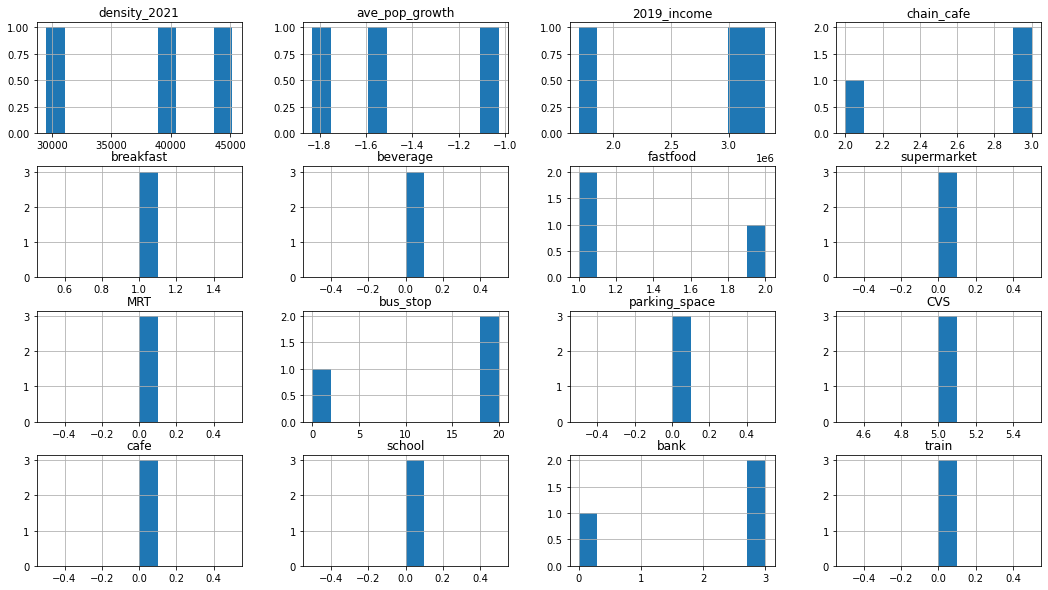

In [144]:
dfz_18.hist(figsize=(18, 10));

# 大部分人口密度(39318.69)
# 人口大多緩步負成長(-1.526821)
# 年收均值(3040572)
# 平均有(3)間小型咖啡廳
# 早餐店(1)
# 飲料店(0)
# 速食餐廳(1)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(5)
# cafe(0)
# school(0)
# 銀行(3)
# 火車站(0)
# 巴士站至少(18)站

In [145]:
dfz_19=feature_o[feature_o['labels'] == 19].loc[:,'density_2021':'train']
dfz_19.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.000000e+00,4.0,4.0,4.00000,4.0,4.0,4.0,4.000000,4.0,4.00,4.00,4.0,4.000000,4.0
mean,79215.555480,-0.460717,1.191803e+06,2.0,1.0,0.50000,0.0,0.0,0.0,11.250000,0.0,2.25,3.25,0.0,1.000000,0.0
std,19284.996289,0.447580,1.737231e+05,0.0,0.0,0.57735,0.0,0.0,0.0,2.061553,0.0,0.50,1.50,0.0,1.154701,0.0
min,51697.047004,-0.890963,9.668210e+05,2.0,1.0,0.00000,0.0,0.0,0.0,9.000000,0.0,2.00,2.00,0.0,0.000000,0.0
25%,73951.754818,-0.819939,1.098832e+06,2.0,1.0,0.00000,0.0,0.0,0.0,9.750000,0.0,2.00,2.00,0.0,0.000000,0.0
50%,84628.946010,-0.472500,1.235580e+06,2.0,1.0,0.50000,0.0,0.0,0.0,11.500000,0.0,2.00,3.00,0.0,1.000000,0.0
75%,89892.746672,-0.113277,1.328551e+06,2.0,1.0,1.00000,0.0,0.0,0.0,13.000000,0.0,2.25,4.25,0.0,2.000000,0.0
max,95907.282896,-0.006905,1.329230e+06,2.0,1.0,1.00000,0.0,0.0,0.0,13.000000,0.0,3.00,5.00,0.0,2.000000,0.0


In [146]:
feature_o[feature_o['labels'] == 19]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
275,louisa,新北市新莊區昌平街46號,25.053460,121.454795,95907.282896,-0.006905,1142836,2,1.0,0.0,...,0.0,13.0,0.0,2.0,2.0,0.0,2.0,0.0,新北市新莊,19
292,louisa,新北市板橋區國光路189-5號,25.018654,121.461442,51697.047004,-0.148735,966821,2,1.0,1.0,...,0.0,10.0,0.0,3.0,5.0,0.0,0.0,0.0,新北市板橋,19
635,85 cafe,新北市新莊區昌平街57號,25.053056,121.454680,87887.901264,-0.796265,1328325,2,1.0,0.0,...,0.0,13.0,0.0,2.0,2.0,0.0,2.0,0.0,新北市新莊,19
645,85 cafe,新北市板橋區國光路189號,25.018550,121.461117,81369.990756,-0.890963,1329230,2,1.0,1.0,...,0.0,9.0,0.0,2.0,4.0,0.0,0.0,0.0,新北市板橋,19


In [147]:
dfz_19.median()

density_2021      8.462895e+04
ave_pop_growth   -4.724998e-01
2019_income       1.235580e+06
chain_cafe        2.000000e+00
breakfast         1.000000e+00
beverage          5.000000e-01
fastfood          0.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          1.150000e+01
parking_space     0.000000e+00
CVS               2.000000e+00
cafe              3.000000e+00
school            0.000000e+00
bank              1.000000e+00
train             0.000000e+00
dtype: float64

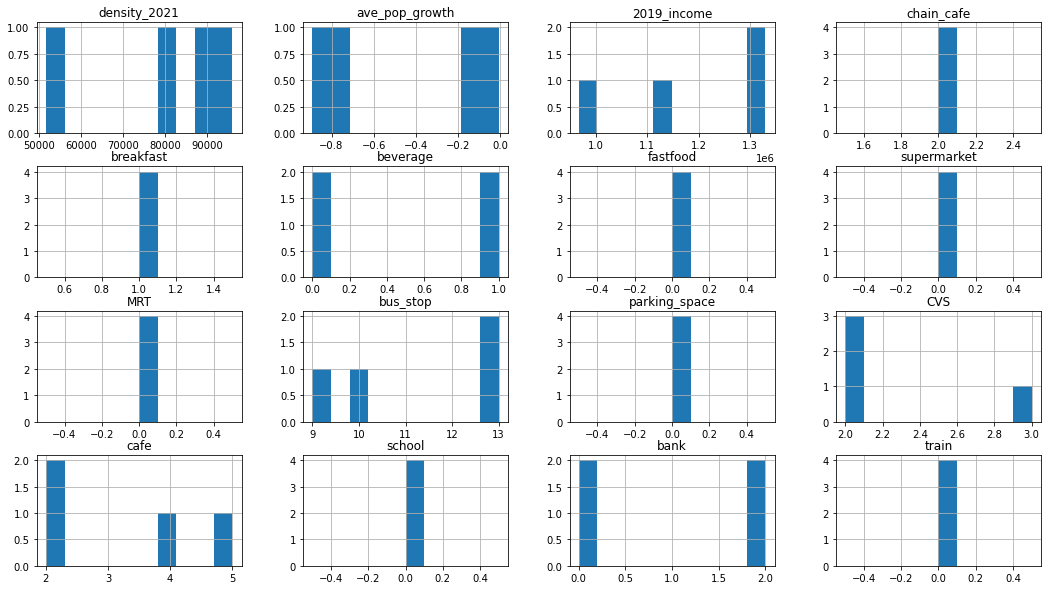

In [148]:
dfz_19.hist(figsize=(18, 10));

# 大部分人口密度(84628.95)
# 人口大多緩步負成長(-0.4724998)
# 年收均值(1235580)
# 平均有(2)間小型咖啡廳
# 早餐店(1)
# 飲料店(5)
# 速食餐廳(0)
# 超市(0)
# 捷運(0)
# 停車場(0)
# CVS(2)
# cafe(3)
# school(0)
# 銀行(1)
# 火車站(0)
# 巴士站至少(11.5)站